### Experiment A10 Plotting

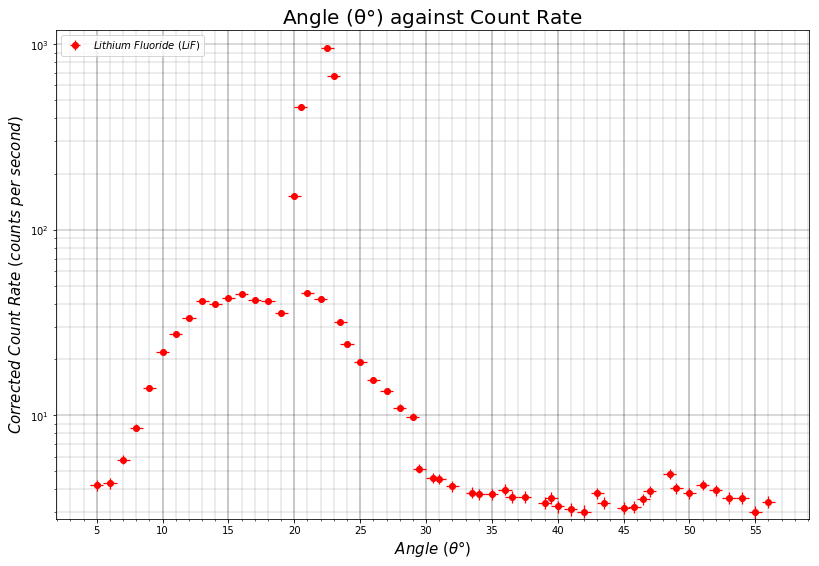

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

class Error(Exception):
    """Base class for exceptions in this module."""
    pass

class InputError(Error):
    """Exception raised for errors in the grad function."""
    def __init__(self, message):
        self.message = message

plt.figure(figsize=(13.5,9)) 
Angle, Angle_Uncertainty, CountRate, CountRate_Uncertainty, BackgroundRate = np.loadtxt("LiF Data.csv", unpack=True, delimiter=",")

#Correct CountRate
CountRate = CountRate-BackgroundRate

plot = plt.errorbar(Angle, CountRate,xerr=Angle_Uncertainty, yerr=CountRate_Uncertainty,fmt='ro', label="$\mathit{Lithium \ Fluoride \ (LiF)}$", linewidth=1.25)

def findGradIntercept(n=1, *args, **kwargs):
    if (kwargs.get("xdata") == None or kwargs.get("ydata") == None): 
        raise InputError("Insufficient Data Specified (Provide x and y data arrays)")
        
    if (kwargs.get("x") is None):
        if(kwargs.get("y") is None):
            raise InputError("Insufficient Data Points Supplied (Please provide x or y data points)")
        ypoint = kwargs.get("y")
        #Find data points for grad calculation
        xdata = kwargs.get("xdata")
        ydata = kwargs.get("ydata")
        ypoint = kwargs.get("y")
        index = (np.where(ydata==ypoint))[0]
        y2point = xdata[index+n]
        xpoint = ydata[index]
        x2point = ydata[index+n]
    
    else: 
        #Find data points for grad calculation
        xdata = kwargs.get("xdata")
        ydata = kwargs.get("ydata")
        xpoint = kwargs.get("x")
        index = (np.where(xdata==xpoint))[0]
        x2point = xdata[index+n]
        ypoint = ydata[index]
        y2point = ydata[index+n]
        
    #calculate grad
    grad = (y2point-ypoint)/(x2point-xpoint)
    intercept = ypoint - (grad*xpoint)
    
    return grad, intercept


#Deal with axes, ticks and grid
plt.legend(loc="upper left")
plt.yscale('log')
xtick_majorspacing = 5
xtick_minorspacing = 1
plt.ylim([0,1200])
ax = plt.axes()
ax.grid(True, which='major', color='black', linestyle='-', linewidth=0.3)
ax.grid(True, which='minor', color='black', linestyle='-', linewidth=0.15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(xtick_majorspacing))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(xtick_minorspacing))



plt.title(r'$\mathrm{Angle \ (\theta \degree) \ against \ Count \ Rate }$',loc="center", fontsize=20)   #Add centred title as Roman font in Math Text 
plt.xlabel(r'$\mathit{Angle \ ( \theta \degree )}$',fontsize=15)   #Add labels as Math Text using $ 
plt.ylabel(r'$\mathit{Corrected \ Count \ Rate \ (counts \ per \ second)}$', fontsize=15)

plt.savefig("Voltage Response against Input Frequency.svg", dpi=300)


0.110345066542
[-29.91666667]
[  6.49197599e-33]
[ 3.04794521]
[  6.08625405e-34]
[ 4.95390071]
[ -6.31972636e-33]
[ 6.44665461]
[  1.05922779e-33]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


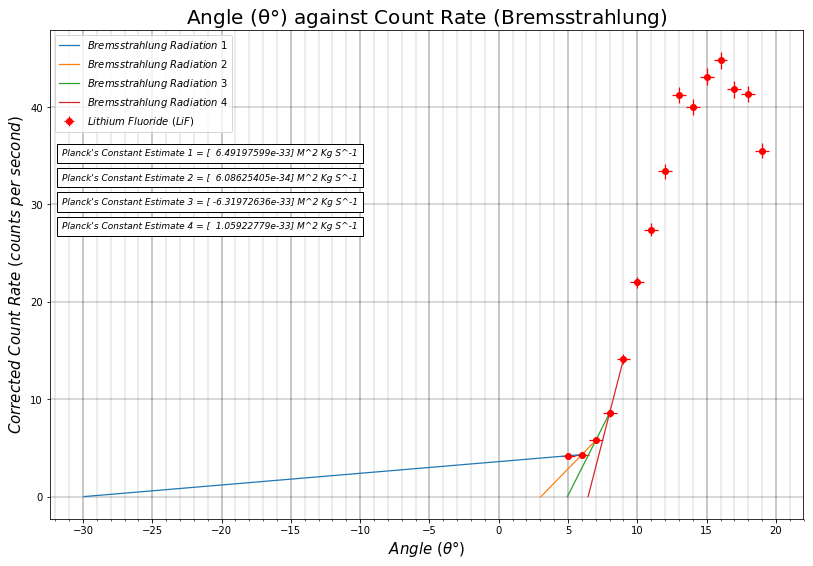

In [76]:
plt.figure(figsize=(13.5,9)) 
plot2 = plt.errorbar(Angle[0:15], CountRate[0:15],xerr=Angle_Uncertainty[0:15], yerr=CountRate_Uncertainty[0:15],fmt='ro', label="$\mathit{Lithium \ Fluoride \ (LiF)}$", linewidth=1.25)

acceptedD = 2.815*10**(-10) 
weightedD = 2.03*10**(-10)

#Deal with axes, ticks and grid
plt.legend(loc="upper left")
xtick_majorspacing = 5
xtick_minorspacing = 1
ax = plt.axes()
ax.grid(True, which='major', color='black', linestyle='-', linewidth=0.3)
ax.grid(True, which='minor', color='black', linestyle='-', linewidth=0.15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(xtick_majorspacing))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(xtick_minorspacing))

expectedLamda = (6.626*10**(-34)*299792458)/(20000*(1.602*10**(-19)))
expectedCutOff = np.arcsin(expectedLamda/(2*AcceptedD))
print(expectedCutOff)

x_min=Angle[0]
y_min=CountRate[0]
x_max=np.max(Angle[0:15])

#Plot bremsstrahlung radiation extrapolations, find cut off and calculate plank
for i in {0,1,2,3}:
    n = 1
    grad,intercept = findGradIntercept(x=Angle[i],xdata=Angle,ydata=CountRate, n=n)
    bremx = np.linspace((-intercept)/grad,Angle[i+n],100)
    bremy = (grad*bremx) + intercept
    plt.plot(bremx,bremy, label=r"$\mathit{Bremsstrahlung \ Radiation \ }$" + str(i+1), linewidth=1.25)
    cutoff = -intercept/grad #x = cutoff when y = 0, x = -c/m
    print(cutoff)
    lamda = 2*weightedD*np.sin(cutoff)
    h = ((30000*(1.602*10**(-19)))/(299792458/lamda))
    plt.text(-6.3*x_min,(((4-i)*2.5)+25), "Planck's Constant Estimate {1} = {0} M^2 Kg S^-1".format(h,i+1), style='italic', fontsize=9,  bbox={'facecolor':'white', 'alpha':1, 'pad':5})
    print(h)

plt.legend(loc="upper left")
plt.title(r'$\mathrm{Angle \ (\theta \degree) \ against \ Count \ Rate \ (Bremsstrahlung)}$',loc="center", fontsize=20)   #Add centred title as Roman font in Math Text 
plt.xlabel(r'$\mathit{Angle \ ( \theta \degree )}$',fontsize=15)   #Add labels as Math Text using $ 
plt.ylabel(r'$\mathit{Corrected \ Count \ Rate \ (counts \ per \ second)}$', fontsize=15)

plt.savefig("Voltage Response against Input Frequency (Bremsstrahlung).svg", dpi=300)


In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAy8AAAJBCAYAAABPpIquAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XtcVVX++P/XIhJHESTyMoYakY5alEEJmX5iAkTUkdBsvJbfsc/PJu2jo+Y0aWU1Rc7HsZzGxkZxxMxLKF7RFFC0PgKCYKVoGoKJN1BLzRsi6/fHPpy4HOCcwx3ez8fjPOTsvdfa6732xb3OXmtvpbVGCCGEEEIIIRo6h/ougBBCCCGEEEJYQxovQgghhBBCiEZBGi9CCCGEEEKIRkEaL0IIIYQQQohGQRovQgghhBBCiEZBGi9CCCGEEEKIRkEaL0IIIYQQQohGQRovQogapZRyrO8yCNGUyDElhBC/kMaLEKLGKKWeAcbWcJ5zlFK9azJPIRqL2jimRNMm50zR1EnjRYg6ppS6Syl1WinlUsfrDVNKfaWUOqyU+lMt5P8U0E9rvczCvK5KqUVKqfeVUp8rpVrbkHUE8DellGdNlbW2KKWeVEpdUEpNre+yVEQp1VopNUMptVcptVsptVEp9ZlSKsQ0f6JSakx9l9NeSik/pVSiUuqSUqpIKZWvlNpi+iSYYn5PKdW5vstalbLHlIXYzpvi2qSU2myK7Sul1P+nlLqjfkvf+Nhyjqzt82k1NZpzphD2kMaLEHXv90AH4Jm6XKnWeiMwBugMtKnJvE0NsfeBVy3MuxeIAd7QWr8KJAPvlZh/h1LqHaXUGqXUOqXUnDLlvgm8BHyqlFI1We5a8GugLdC9NleilHJXSj1pR7p+wDHgMeD3WusntdZhGL/s91RKLQDmAw3qwteWeLXWKVrrAGCEadJCrfUQ0ycQGIxxDGQqpcLqqlx25F3umLIQ2z9NcQ3VWv9Oa/0k8DfgXxjHXJNTm3VuyzmyNs+n1dXIzplC2EwaL0LUveJGy+i6XrHW+gSQXwtZvwas0FrfKDlRKXUnsBb4h9Y6zzT5B6DkReMrQL7W+vda6+HARaXUtDLl/t6Urs7rzBZa69VAN2ByLa/qYcCmCzillB8QB2wx1fXJ4nna8CHwE9CyRktaM2yOF7hp+reo5ESt9c8YF3atgOVKKec6Lpe1LB5TJhZjA9BabwI2AkOUUkNrqWz1qTbr3KZzZC2eT6utsZwzhbCHNF6EqENKqS7AGeA74Eml1K/ruUjVppRqBfw38KmF2VOBjsBnJaa5Ap1LdGsZoLX+R/FM09+DLOS1AOOCrkHTWh/XWpe7qKxhI6pe5BemRuQq4EdgSiWLvgdcqEa5aotN8VZFa30FI05nqneXrEbLVayKY8oa2aZ/m2K3oVqp8yaqUZwzhbCVNF6EqFujgDXAaoyuOSPrtzg1YjCQrbX+seREpZQTMBNYorUuLDGrp+nf4vPPrZJPUzKlu21hPanAPUqpB2qs5DVIKdVCKdVdKfWEUurhWlrHnUqpkcAfbEw6FrgXWKO1vl7RQqbuJmvsL2HNqka8VeV7F3A3cBY43FDKVYLFY8oapm5CAcAtIKGGy1Vv6qDOm6IGfc4Uwl7y+EUh6tYgjDEF3wFzMG7pf1B2IaXU08DbGGMoPgRSgN8CrTHGK0zXWieXSfMHIASjq4AHEA/0AB4FVmmt/11RoZRSv8MYi3PatM7LwCta62tWxBQM7LUwfRRwF+Uvhp8Armitb5m+Lwf+19RVTAHzgGVlM9NaFymlkoCBwKHKCqSUaoFxh8EZcMJoMK2v4GECVdablfl1A/4ODDCV/w+m/G3alqblHwcuYnThutsU/8sYd7L+C7gTGK2UetSU7A2t9YFKquR3gAbSKlmm2BeAuauSqbvZZIwL/Tsx7pxFaK2PmuaPxtin2wPLtNbFccdjXEQ7APdqrX+wY7+2N94KKaXaAf8GjgPPlG3MWbmtqyxXLR1TVcXmhLEtugJjtNYHTdOfBt4BOmGMoWmHsX/fBYRqra9XVt5Ktpsz0Af4E3AAmA64YNTZj8AfS8Zbwb6ttNaTK5lv1b5fVYwYP4hYdU4oUd6hpvK0AnyBP2mtU6vYBrV5PNh0nrflnClEo6K1lo985FMHH6AXEFniezrGf6jdKlj+LowLiM3A/ysxfQHGr7Ill51oWtbZ9P1+oBDwwbiYHlJi2WyM//CLv/8B48KjVYlp/8Hob29NXKnAf1uYvgG4CmwFtpn+jTeVa3eZZUdh3I1aBTxbybrmAZ9aUaZZGBdA95i+d8TorjfJnnqzNr8S9bHUnm2JcRGSUCbt7y3kVwS8bsO+941pXwu2cZ/9HcadibvKlDEbeLjEtBam+ilbzj+b1tvFnv3a3nhNaZ40pdsJvIHxY8Em0z75KnBndfadyspVW8eUhdj2YHT1e890bCSatnWQhTTF9b4T40L8JdO26WlNeavYbjkYDxe42zTtDoyxIO9Yu2/XxL5fRYy2bNdsUx4jy8R5vIJl3ygzrVaOB2w4z5dIY9U5Uz7yaUwf6TYmRN0ZQ+m7EKsx7jRYHFCptb6I0S//Pq31f0rMOgh0UUq5l5j2EnBIG4OR0cZgzfPAFK31Dq31FkvrUEq1xfhPcoEu/YvwcmCUUsrNirjuxRjoXTJfB4wLrBit9SCtdajWehDGnQkHjAuDkrGu0lqP1FqP0lp/Xsm6fgS8rChTHnAOo+sMWuuzGF1o/rvMctbWm7X5AfxcdoIN2/IhoF2ZQeSbsTwOpVafIqSMx1kvBT42lR8ArfURjAHhy0pMKwAuWcjmbNkJNu7XpYpkawwmiVrrt7XWc7TWQzEeEDEL41d8S2zZ1uXKVVvHVAXitdavmT4ztPEksv8PiFFKLS65YIl6d9Ba7wcWYYz3OWNNeavYbp2Br7XW503L3gaOYtwNKFbVvl3tfb+iGLXWh7F9u7bSxgM4SsbZ1dTlsFK1eDzYc5639pwpRKMh3caEqDvBwOslvq/GeB7/KOCtStKV7R5TYPq3Nb/8x34eKHtR5ETVj7wdYsrnv0zvvVAY3YtaAbsxHvtbVb97V8pfaN1jmp5cZvogU/5rq8izIhdN+VZKa71YKRUJBCqlfosR1wMYXVpKsqrebMivKlVtyy8xHqOdq5TaBOwDVmutX7FxPWV9j1He9lUtaBrc74gx7uIujC6OZX0HvKyUekRrnWFnmazZr2uc1vpjpdRzwGdKqXtMF9ol51d3W9fWMWUVrXWyUurvwJtKqWyt9XtlFsk0LVcEZCmlxtpY3oq2234L051KfK9q367Jfb9UjKa/bd2uluIBo9vZRWpebZ3nrTpnCtGYSONFiDqglHoccAfWmgbUaoz/PH8EuimlfE2/FFpys4LpJf0V2KaU6qm1PqyUGojRN/zvVaS7x1SWaK31VmtisUBT/uEfHUz/ZhZPMD1dbASwR2ttb//rIqx4B4lpwPxKjO43r2mtTyulOlL+EatW1ZsN+VWl0m2ptT6jlOqD0a1pEMbduv9VSv2/Mr8C22oj8DTGL+GfVbFsCEa3l/tM3wstLFM8Xul+wN7GizX7dW05gjGm4FGMcQZmNbCta+uYssVm4E3gj5R4p5LJuTLfbS1vRdvN0iOdzarat2t43y8boz3bta73z9o6z1t1zhSiMZFuY0LUjTHAWK31MK11ePG/wGyMRkx132h+A6Nf/38rpf6GcQHqY8Wv4j+Y1l/ubeOmRpY1fsL4hb6kQowLopLdJAZhDKJ9Hfu5Y7k7hpnpzsEmjP7i47XWpy0sc7/pzyrrzcb8qkUp5Q0UaK3/qLXuCnTBuEO3yFSOitJ9WEXWKzEGqD+rlKrqPS4BGBf0ZzD2DUt3a4q7spS7SCyjVn4gsyLeqmjTv6Uek1zdbW0qV20dU7YovhBubWGeLvO9Jspbpar27Rre93WZZersGK5CdY8He87zVZ4zhWhspPEiRC0z3XHw1lonWZi9CuNC4/fVXE1fYKvWeprWeqbW+k/a9DSoKmzGuFCy9F6VaUqprlbkkU35C60fTP+W/NV+GvBvrfVXVuRZEXd+eYdFRR7AuBAr+ytyyYvwWaZ/rak3W/KrLh9KPD5ba30KmIDx62nbEstdx3QhZLowq/SXVW082W0URpeTCi/8lVLdgNam9W7GGNz+GwuLPgrkAiW35XXKj0WwlNYeNsVrhZ/5pdsQpnzvxfZtbalcm6idY8oWxeuOs2LZmjgHWKOqfbtW9n2TujyGi9XG8WDPed6ac6YQjYo0XoSoff/NLxfzpWitL2E8iaujUirUwiLF4w9KalFiXrFTwHtKqaeUUv+llHpEKdUByxyL8zQN/HwBCDJ12QDMv5Leo403SFflK4wnqZWM6yLGo157mPL7g6nclb0g0Rrdqbqb0ingGsYAYEzr98a461O277c19WZLfmB5m1U03dK2nF5mkG5n4KjWuuSbvPcC3qa/H6NM1ydLtPGI1yDgd0qp1cp4YaqZUioAY+zVDNPyFzGebjShZJ0opTwxutqM06VfxrkPowtS8XIdAH/T1/sozdq6KGZzvMCvTP+2sjAvBuOi+HFTWTsDz2Fs6+tYv63LlUtrfZVaOKbKKI6t3P/hSql+GHd0T2LaliXcSelxKLaeA2zZbndamFbVvl0T+365GLH9GHa0UPaK4jSfT8uojePBlvN8MWvOmUI0KkrrsneQhRA1wTQodD6//If5LfC4Nr1XQinVE/gY8MP4z/Y6Rn/s1zF+dX0DeARjfME+jPEi/wACMX5BzwH+o7X+q1Lqbox+/CUHcyqM/+z+rLVeqYx3FhTneQ3jnR8hWusCpVRfjBdK5mGMw7kM/K/pqTlVxRkEfKi1frDM9J7AXIxf6AuAmdbkV8l6FMbg06BKxgcVL/tfGBfi32NcxP2E8bby7RiDXt/TWn9lulD6jvL1lgu8qrVeaW1+GBeS8zAe0XoL4wL0dxgParBqW2J07eqKsf2LxxC4AnNNv0QXx3cfxrtKfgAuaa3/VHUNmtO2wnhqUTjGXb9LGNvn/4CFZQewK6WeMC3/I8YF/68wtvehMsu5Y+zvPwJXTJ8sYAnGfrUS4yLK6v3anniV8V6a903raGMq835gudb64xLLDQT+gvHI8jYY7zT50dp9p6py1dIxVTa2C6Y6LG5EumO852QjxmOKL5jSlTz2CzHOM3O11putKW+Z9BVttxPACoz3BP0vxnkNjPPMFIwnXlW4byulxmB0FbNr368qRiuP4ZLn3ZumPH4HRAH9KX2sfkMF51PT+mr8eKjkPF/qfFWirqw+ZwrRmDSYxotSKgfjP9Ei4JbWuo8yHtG4BuOEl4Px/gfpuylECaZfjXdgvEhwp9ZaK+NFe50wLlDfw+i29n0trb8FRiPpIa31mdpYh2k9j2G8d6JGuiLVd70JUZG6OqZE42HP+aqmz5lCNBQNqdtYERCgtX5Ea1186/pVjOfY/wbjvRB/qbfSCdFwDQeOaK0TtOnXCK11gdY6R2v9AcadBe9Kc6gG0y+NCzHegF2bXqaS8Rp2qNd6E6IidXhMicbDnvNVTZ8zhWgQGlLjRVG+PGEYt2sx/ft0nZZIiMYhDvBRSvmXnaGUGoDxXoLqDJK3xv8Cocp4QV+NM42zeAiju0hNaQj1JkRFavWYEo2OTeerWjpnCtEgNKRuY8cx+qDeBj7RWi9RSv2otXYrscxFrXV1nsAiRJNkelLSNIz/wK5gPIGnFUbXkw90iTek12IZ/DDGDTxTw/k6YjwRaabW+tsazvte6rnehKhIbR1TonGy9nxVm+dMIRqChtR4+bU2XlLVDqNf5/8AG0s2VpRSF7TW7hVmIoSoV0qpEKCH1npBDeb5FrBLa51YU3kK0VjUxjElmjY5Z4qmrsE0XkpSSr2J8Rz+FzDGwZxTxptwd2mte1pYvuEFIYQQQgghhKiU1tqmF+I2iDEvSqlWSiln09+tgQEYj5XdBIw3LfY8xuMfLdJaW/05f/48r7zySq0tX1frSE5O5pFHHmn0cUjs1qexNe6GGkddbPPmHHtDjUNib37HenOOvans78059qayvzfk2O1h6cVK9aEDsN50B8UR+ExrvUMplQZ8bnrB3Qng2Zpa4RNPPFGry9fVOn7961/X+joaYl1B843d1rjtWUdDrSuJvXbX0RDrCppv7E1lf7cnTVOJvans7/akaSqxN5X93Z40dbVv2apBNF601tlAbwvTL2K8EbrG9evXr1aXr6t12LrDN9Q4JHbr2XOSa4hx1MU2t2c9TSX2hhqHxG69prK/25OmqcTeVPZ3e9I0ldibyv5uT5q62rds1SC6jQn7+fj41HcR6k1zjb25xg0Se3PVXGNvrnGDxN5cNdfYm2vc9pLGSyPn6+tb30WoN8019uYaN0jszVVzjb25xg0Se3PVXGNvrnHbq0F0G6st9957LydOnKjvYgjRYHXt2pWcnJz6LoYQQgghhFWadOPlxIkTaC1PURaiIkrZ9HRCIYQQQoh6Jd3GhBBCCCGEEI2CNF6EEEIIIYQQjYI0XoQQQgghhBCNgjRehBBCCCGEEI2CNF6EEEIIIYQQjYI0XoRoIn788UfCw8NxdnbG09OTVatW1XeRhBBCCCFqlDRe6tn+/fsZMmQIgYGBLF26lMjISKZOncqcOXPqu2g14ujRowQEBBAZGVlu3tq1a2nfvj03b96sk7Kkp6cTFhZGQEAAS5cu5eOPP2bixIns3r3bpnx27NiBp6cnx48fB+DVV18lLi7OrjJVJ21ZL730Ei1btiQ/P58VK1bwxz/+kcOHD9dI3kIIIYQQDUGTfs9LY+Dr64uzszOTJk0iNDQUgKtXr+Li4sLMmTNp1apVPZcQAgMD2b59O46Otu8u3bt3x8nJiYCAgHLznnjiCXr16oWTk1MNlLJqPj4+ODs7M2HCBIYOHQrAxo0bmTJlCgcOHLA6n+DgYFxcXLjvvvsAeP/9961KZ6kerU1blWvXrhETE0NmZia/+tWveOKJJwgLC+PTTz/lvffeq5F1CCGEEELUt2bbeCkshNzcmsnLwwPsuK43S05OZtmyZebvERERTJ48uUE0XE6dOgVgV8MFoKCggJycHLy8vMrNi4+PJzAwsFrls1VSUhKLFy8G4NatW3z66adMmzbNpjzS09Px8fGxKU1167EqR48e5c477yxVzw8//LDNd5WEEEIIIRqyZtt4yc0FT8+aySs7G+691760mZmZ3H333ezZs4eioiI2b97MI488wgsvvMD+/fs5duwYixYtIjw8nOXLl7NhwwauXLlCVFQUTz75JGlpabzxxhscOnSIlJQUDh48SP/+/SkqKmLDhg2MHz+egoICVq5cyZw5c/Dy8jKn9/Ly4vDhw+aL97LTvb29WbJkCR07dmTFihWMHTu2wjLdvHmTZcuW0a9fP6KjowkNDeWZZ55h7969uLm5sX37do4cOYKjoyOTJk0CICEhgYkTJwJw8uRJUlNTiY6OZtWqVRQWFhISEkJCQgLp6ekkJydz+vRpHnvsMQoLC4mNjWXp0qUAFBUVERERQc+ePTl37hzJyclERUWVq+sjR47Qtm1bvvrqK44fP05qairz58+nS5cuAHz//fcWYwA4duwYy5cvp2/fvnzyySeMGDGCixcvEhcXx7p16/j8888rzMPV1bVcPVpKe/r0aSIjI/Hx8SE1NZVx48Zx6dKlSmMv9vPPP+Pi4lJqmouLC1euXLFvxxRCCCGEaICa7ZgXDw+j0VETHw8P+8uxa9cuhg0bxoABAxg4cCAffPABERERZGVl0aJFC3r16sWdd97JlClT2Lt3Ly1btmTQoEHMmDGDQYMGmceL5Obm0rt3b77++mvCw8MZPnw4ycnJeHp6EhoairOzs3n8w/r168nNzaVv376lxkSUnR4cHMwdd9zBtGnTGDt2LIDFMrm7uzNs2DCmT5/OwIEDOXv2LA888ABgNFCGDx9OSEgI/v7+JCYmmte3b98+/Pz8APjuu+/o06cPp0+fBiAlJYXOnTsDkJ+fT48ePcjMzCQsLIzhw4eXymf27Nl4eHgwbNiwUt25ytq5cydDhw5lwIABvPjii5w5c4azZ88CRrerimK4du0aI0aMYMaMGYSGhnLlyhUCAwPJyMggJCSEnJycSvOwVI+W0j799NO89NJLDB48GD8/P+bNm2cxdkt3U5ydnbl8+XKpaZcuXaJNmzYV7XpCCCGEEI1Os228ODoad0tq4lOdnkCJiYn069fP/L1Fixa0adOGgwcP4u3tzY4dO8y//js5OREdHU3Xrl05cOAAK1euZPLkyQCEhIQQFxfHmDFjAMjKysLLy8t8Ib97924ef/xxAEJDQ8nPz8fb2xtfX1/zui1Nz8jIKLWMpTLFxMTw4IMP4ubmxu3bt8nJyaFnz56A0WAYP348YHQT69+/P2A0Vrp164aDg7ELBgUFERUVZS5/QkICISEhpWIrvvBPSkqid+/eANy+fZtFixYxcuRIc30OHDjQYl3v2rXLXAcAFy9eNA+6ryyGmJgYvL29cXV1paCggCtXrtCxY0cCAwOJiori+eefrzKPAwcOlKrHsmnXrFnDo48+iru7OwCHDx+mVatWFmN/+OGHy8XWvXt3CgsLycrKMk/7+uuvzQ0wIYQQQoimoNk2XhoCrTV79+41330AiI2N5dKlSwQFBQHGk60GDBhgnl985yU4OJjRo0eTl5dHQUEBAHFxceZlS/6dlJRE9+7dycvLY9++fcyePZvIyEjS0tLMv+Jbmp6ZmUmvXr0AWL16tbkMZcuUn59vHgOSmJhInz59iI+P5/LlyxQUFNCuXTsAVq5cyejRo9m6dSu7du3iqaeeYsuWLeZ8kpKSzA25uLg4goKC2LFjB2A0gorHx0RFRfHcc8+xZcsWrl69ioeHB05OThQUFJCWlkafPn0s1vWePXvw9/c3T/v2229xd3fnzJkz5OXlWYyhqKiI/Px8c2MpISEBPz8/tm/fbo5p3LhxxMbGcv78eYt5ZGZmmhsxJeuxZNpbt27RrVs3AK5fv866deuYPn16pbGX1KpVK4YNG8Ybb7zBtWvX+Oqrr9i8eTPjxo0rVxdCCCGEEI2VNF7qSUZGBq+99hqFhYVERkaycOFC3n77bdatW8eXX35J69atAbhx4waeJQbnjBo1ip9//pnY2FhiYmLIy8ujRYsWaK0pLCzEw9SHLSMjgyFDhgDg4OBAp06dOHToEO3bt8fX15dNmzaxatUq5s2bB0C7du3KTb/rrrtwdXVl9erVpZ4WZqlMp06d4osvviA7O5s2bdpw/vx50tPTzWUA8PLyYufOnfj4+ODp6Wkue7Hw8HA2b95MdHQ0999/P1u3buWhhx7i+vXruLm54erqChhdpH766Sc6dOiAi4sLYWFhrF27loiICHr06IFSqlRdf/PNN8yaNcvcKCg2YcIEkpOTzXesLMXg4ODAqFGjyM3NZdu2bZw9exZHR0dzFy0vLy+2bNmCn58fI0eOtJhHRfVYNu2FCxeIjY1l/vz5LF68mE6dOlUae1kLFy7k2rVrtG/fnrFjx7Jo0SJzo0kIIYQQoilQWuv6LkO1KaW0pTiUUjSF+ETFzp07R9u2bXFycmLu3Ll4enry7LPP1nexGg1Lx8iFCxcAzF3YrGFrGnvWkZKSAlDqTmVDKFdDjL2hxiGxW5+mqezv9qRpKrE3lf3dnjRNJfamsr/bk6auYvf390drrape+hfN9mljommYNWsWPj4+5idtScNFCCGEEKLpksaLaNSWLFlS30UQQgghhBB1RMa8CCGEEEIIIRoFabwIIYQQQgghGgVpvAghhBBCCCEaBWm8CCGEEEIIIRoFabwIIYQQQgghGgVpvAghhBBCCCEaBWm8CCGEEEIIIRoFabwIIYQQQgghGgVpvAghhBBCCCEaBWm8CNFELFy4kMcee4yWLVvyhz/8ob6LI4QQQghR46TxUs/279/PkCFDCAwMZOnSpURGRjJ16lTmzJlT30WrEUePHiUgIIDIyMhy89auXUv79u25efNmnZQlPT2dsLAwAgICWLp0KR9//DETJ05k9+7dNuWzY8cOPD09OX78OACvvvoqcXFxdpWpOmnLuueee3j99deZMGFCjeQnhBBCCNHQONZ3AZo7X19fnJ2dmTRpEqGhoQBcvXoVFxcXZs6cSatWreq5hBAYGMj27dtxdLR9d+nevTtOTk4EBASUm/fEE0/Qq1cvnJycaqCUVfPx8cHZ2ZkJEyYwdOhQADZu3MiUKVM4cOCA1fkEBwfj4uLCfffdB8D7779vVTpL9WhtWms8/fTTAKSmpnLq1Kkay1cIIYQQoqFoto2XwqJCci/n1kheHi4eODrYX5XJycksW7bM/D0iIoLJkyc3iIZL8UWwPQ0XgIKCAnJycvDy8io3Lz4+nsDAwGqVz1ZJSUksXrwYgFu3bvHpp58ybdo0m/JIT0/Hx8fHpjTVrUchhBBCCNGMGy+5l3PxXOBZI3llT8nm3rb32pU2MzOTu+++mz179lBUVMTmzZt55JFHeOGFF9i/fz/Hjh1j0aJFhIeHs3z5cjZs2MCVK1eIioriySefJC0tjTfeeINDhw6RkpLCwYMH6d+/P0VFRWzYsIHx48dTUFDAypUrmTNnDl5eXub0Xl5eHD582HzxXna6t7c3S5YsoWPHjqxYsYKxY8dWWKabN2+ybNky+vXrR3R0NKGhoTzzzDPs3bsXNzc3tm/fzpEjR3B0dGTSpEkAJCQkMHHiRABOnjxJamoq0dHRrFq1isLCQkJCQkhISCA9PZ3k5GROnz7NY489RmFhIbGxsSxduhSAoqIiIiIi6NmzJ+fOnSM5OZmoqKhydX3kyBHatm3LV199xfHjx0lNTWX+/Pl06dIFgO+//95iDADHjh1j+fLl9O3bl08++YQRI0Zw8eJF4uLiWLduHZ9//nmFebi6uparR0tpT58+TWRkJD4+PqSmpjJu3DguXbpUaexCCCGEEM1Js228eLh4kD0lu8bysteuXbsYNmwYAwYMAOCpp56iZ8+e/Pa3v6VFixb06tWLO++8kylTpvDiiy9y+fJl+vfvT2pqKu3ateNYzq1WAAAgAElEQVT//u//AMjNzaV379589tlnzJ8/HzDGU7z11lvcd999bNq0icOHD+Pl5cX69evJzc1l3LhxxMTEmMtSdvq0adP4z3/+w7Rp0/D19QWwWKbbt2/j7+/P7t27cXNz46OPPuKBBx4AjAbK8OHDCQkJoW3btsybN8/ceNm3b5/5Ivy7776jT58+LFiwAICUlBQ6d+4MQH5+Pj169CA+Pp6//vWvALzyyivmcs+ePZvf/OY3DBs2jM8++8zcnausnTt3MnToUHNdb9q0ibNnz9KlSxeuXbvGsGHDLMZw7do1RowYwe7du3F1dWXevHkEBgaSkZFBSEgIf//7383LWcqjZ8+e5erRUtqnn36abdu24e7ujoODA/PmzePpp58uF/vMmTNt3s+EEEIIIZqCZtt4cXRwtPtuSU1KTEzk5ZdfNn9v0aIFbdq04eDBg4SFhTFv3jzzr/9OTk5ER0fTtWtXDhw4QH5+PpMnTwYgJCSEuXPnMmbMGACysrLw8vIyX8jv3r3bfPEbGhrK7t278fb25rXXXjOv29L0jIwM8wU3gLe3d7kyrVixggcffBA3Nzdu375NTk4OPXv2BIwGw4YNGwCjm1j//v0Bo7HSrVs3HByMZ0YEBQXx7rvvmsufkJBASEiIOba//OUvjB07FjC6fvXu3RuA27dvs2jRIs6cOWOuzxdeeMFiXe/atavUvIsXL3L8+HH69OlDTExMhTHExMTg7e2Nq6srBQUFXLlyhY4dO9KxY0cWLFjA888/b16uojwOHDhQqh4DAwNLpV2zZg2PPvoo7u7uABw+fJhWrVpZjP3hhx+2GJ8QQgghLEhMND4//ghpadC/P7RsCQEBxkc0KvK0sXqktWbv3r34+fmZp8XGxnLp0iWCgoIA48lWxXcKAFq2bMmgQYMIDg5m9OjR5OXlUVBQAEBcXJx52ZJ/JyUl0b17d/Ly8ti3bx+zZ88mMjKStLQ085O2LE3PzMykV69eAKxevdpchrJlys/PN48BSUxMpE+fPsTHx3P58mUKCgpo164dACtXrmT06NFs3bqVXbt28dRTT7FlyxZzPklJSfTr189c/qCgIHbs2AEYjaDi8TFRUVE899xzbNmyhatXr+Lh4YGTkxMFBQWkpaXRp08fi3W9Z88e/P39zdO+/fZb3N3dOXPmDHl5eRZjKCoqIj8/39xYSkhIwM/Pj+3bt5tjGjduHLGxsZw/f95iHpmZmeZGTMl6LJn21q1bdOvWDYDr16+zbt06pk+fXmnsZd2+fZsbN25w+/ZtCgsLuXnzJrdv3y63nBBCCNGsBATAnDkwfjzs3Qsvvmh8l4ZLoySNl3qSkZHBa6+9RmFhIZGRkSxcuJC3336bdevW8eWXX9K6dWsAbty4gafnL2NzRo0axc8//0xsbCwxMTHk5eXRokULtNYUFhbi4eFhzn/IkCEAODg40KlTJw4dOkT79u3x9fVl06ZNrFq1innz5gHQrl27ctPvuusuXF1dWb16damnhVkq06lTp/jiiy/Izs6mTZs2nD9/nvT0dHMZALy8vNi5cyc+Pj54enqay14sPDyczZs3Ex0dzf3338/WrVt56KGHuH79Om5ubri6ugLg7OzMTz/9RIcOHXBxcSEsLIy1a9cSERFBjx49UEqVqutvvvmGWbNmmRsFxSZMmEBycjJxcXGMGTPGYgwODg6MGjWK3Nxctm3bxtmzZ3F0dOTy5cvmmLZs2YKfnx8jR460mEdF9Vg27YULF4iNjWX+/PksXryYTp06VRp7WX/9619p1aoVc+fO5bPPPqNVq1a8++67Ve2KQgghhBCNhtJa13cZqk0ppS3FoZSiKcQnKnbu3Dnatm2Lk5MTc+fOxdPTk2effba+i9VoWDpGLly4AGDuwmYNW9PYs46UlBSAUncqG0K5GmLsDTUOid36NE1lf7cnTVOJvans7/akabCxZ2SAjw/u2dlw7721s44GuL/bk6auYvf390drrape+hfNdsyLaBpmzZqFj48PLi4uANJwEUIIIYRowqTxIhq1JUuW1HcRhBBCCCFEHZExL0IIIYQQoulKTOREdjZ/mzWL94G3pk7lRHa28QQy0ejInRchhBBCCNFknVi/no9iY/mfrCxaAy03buTNgwd5efBgusoTxxodufMihBBCCCGarGXx8bxlargAtAbeyspiWXx8fRZL2EkaL0IIIYQQoskqOnXK3HAp1to0XTQ+0ngRQgghhBBNlsM993C1zLSrpumi8ZHGixBCCCGEaLLGBwXxppeXuQFzFXjTy4vxQUH1WSxhJ2m8CCGEEEKIJqtreDgvx8WxMDSU94F5YWG8HBdH1/Dw+i6asIM8bUwIIYQQQjRdAQF0BWa++y5s24b7hx/CvfeCp2d9l0zYQe68CCGEEEIIIRoFabwI0QQUFBTwwgsvcO+99+Lq6oqPjw9ffPFFfRdLCCGEEKJGSeOlnu3fv58hQ4YQGBjI0qVLiYyMZOrUqcyZM6e+i1Yjjh49SkBAAJGRkeXmrV27lvbt23Pz5s06KUt6ejphYWEEBASwdOlSPv74YyZOnMju3bttymfHjh14enpy/PhxAF599VXi4uLsKlN10pZUWFhIly5d+PLLL7l06RLvvPMOzz77LD/88EO18xZCCCGEaChkzEs98/X1xdnZmUmTJhEaGgrA1atXcXFxYebMmbRq1aqeSwiBgYFs374dR0fbd5fu3bvj5OREgIU32D7xxBP06tULJyenGihl1Xx8fHB2dmbChAkMHToUgI0bNzJlyhQOHDhgdT7BwcG4uLhw3333AfD+++9blc5SPVqbtiqtWrXijTfeMH8fPHgwnp6e7N+/ny5dutTIOoQQQoh6l5hofH78EdLSoH9/aNkSAgKMT1Vp+vaFRYuqTiMarObbeCkshNzcmsnLwwPsuLAvlpyczLJly8zfIyIimDx5coNouJwyvcDJnoYLGN2ZcnJy8PLyKjcvPj6ewMDAapXPVklJSSxevBiAW7du8emnnzJt2jSb8khPT8fHx8emNNWtR1udO3eOY8eO8cADD9TJ+oQQQog6UdzgyMiAf/wDPvvMGHxvTZoLF4zv7u61WkRRu5pv4yU3t+aeMpGdXfWBU4HMzEzuvvtu9uzZQ1FREZs3b+aRRx7hhRdeYP/+/Rw7doxFixYRHh7O8uXL2bBhA1euXCEqKoonn3yStLQ03njjDQ4dOkRKSgoHDx6kf//+FBUVsWHDBsaPH09BQQErV65kzpw5eHl5mdN7eXlx+PBh88V72ene3t4sWbKEjh07smLFCsaOHVthmW7evMmyZcvo168f0dHRhIaG8swzz7B3717c3NzYvn07R44cwdHRkUmTJgGQkJDAxIkTATh58iSpqalER0ezatUqCgsLCQkJISEhgfT0dJKTkzl9+jSPPfYYhYWFxMbGsnTpUgCKioqIiIigZ8+enDt3juTkZKKiosrV9ZEjR2jbti1fffUVx48fJzU1lfnz55vvTHz//fcWYwA4duwYy5cvp2/fvnzyySeMGDGCixcvEhcXx7p16/j8888rzMPV1bVcPVpKe/r0aSIjI/Hx8SE1NZVx48Zx6dKlSmO3pLCwkLFjxzJ+/Hi6d+9u134phBBCCNEQNd8xLx4eRqOjJj4eHnYXY9euXQwbNowBAwYwcOBAPvjgAyIiIsjKyqJFixb06tWLO++8kylTprB3715atmzJoEGDmDFjBoMGDTKPF8nNzaV37958/fXXhIeHM3z4cJKTk/H09CQ0NBRnZ2cOHz4MwPr168nNzaVv377maZamBwcHc8cddzBt2jTGjh0LYLFM7u7uDBs2jOnTpzNw4EDOnj1r/sU/ISGB4cOHExISgr+/P4mJieb17du3Dz8/PwC+++47+vTpw+nTpwFISUmhc+fOAOTn59OjRw8yMzMJCwtj+PDhpfKZPXs2Hh4eDBs2rFR3rrJ27tzJ0KFDGTBgAC+++CJnzpzh7NmzAFy7dq3CGK5du8aIESOYMWMGoaGhXLlyhcDAQDIyMggJCSEnJ6fSPCzVo6W0Tz/9NC+99BKDBw/Gz8+PefPmWYy9sjE6WmvGjh2Lk5MTH330USV7nhBCCCFE49N8Gy+Ojsbdkpr4VKMrUGJiIv369TN/b9GiBW3atOHgwYN4e3uzY8cO86//Tk5OREdH07VrVw4cOMDKlSuZPHkyACEhIcTFxTFmzBgAsrKy8PLyMl/I7969m8cffxyA0NBQ8vPz8fb2xtfX17xuS9MzMjJKLWOpTDExMTz44IO4ublx+/ZtcnJy6NmzJ2A0GMaPHw8Y3cT69+8PGI2Vbt264eBg7IJBQUFERUWZy5+QkEBISEip2Iov/JOSkujduzcAt2/fZtGiRYwcOdJcnwMHDrRY17t27TLXAcDFixfNg+4riyEmJgZvb29cXV0pKCjgypUrdOzYkcDAQKKionj++eerzOPAgQOl6rFs2jVr1vDoo4/ibrqVffjwYVq1amUx9ocffthifAATJkzg/PnzxMTEcMcdd1S4nBBCCCFEY9R8Gy8NgNaavXv3mu8+AMTGxnLp0iWCgoIA48lWAwYMMM8vvvMSHBzM6NGjycvLo6CgAIC4uDjzsiX/TkpKonv37uTl5bFv3z5mz55NZGQkaWlp5l/xLU3PzMykV69eAKxevdpchrJlys/PN48BSUxMpE+fPsTHx3P58mUKCgpo164dACtXrmT06NFs3bqVXbt28dRTT7FlyxZzPklJSeaGXFxcHEFBQezYsQMwGkHF42OioqJ47rnn2LJlC1evXsXDwwMnJycKCgpIS0ujT58+Fut6z549+Pv7m6d9++23uLu7c+bMGfLy8izGUFRURH5+vrmxlJCQgJ+fH9u3bzfHNG7cOGJjYzl//rzFPDIzM82NmJL1WDLtrVu36NatGwDXr19n3bp1TJ8+vdLYy3rxxRc5cuQImzZtokWLFuXmCyGEEEI0dtJ4qScZGRm89tprFBYWEhkZycKFC3n77bdZt24dX375Ja1btwbgxo0beJYYmzNq1Ch+/vlnYmNjiYmJIS8vjxYtWqC1prCwEA9TF7aMjAyGDBkCgIODA506deLQoUO0b98eX19fNm3axKpVq5g3bx4A7dq1Kzf9rrvuwtXVldWrV5d6WpilMp06dYovvviC7Oxs2rRpw/nz50lPTzeXAcDLy4udO3fi4+ODp6enuezFwsPD2bx5M9HR0dx///1s3bqVhx56iOvXr+Pm5oarqysAzs7O/PTTT3To0AEXFxfCwsJYu3YtERER9OjRA6VUqbr+5ptvmDVrlrlRUGzChAkkJyeb71hZisHBwYFRo0aRm5vLtm3bOHv2LI6Ojly+fNkc05YtW/Dz82PkyJEW86ioHsumvXDhArGxscyfP5/FixfTqVOnSmMv6YcffuDf//43Bw4coEOHDrRp0wYXFxdWrVplze4ohBBCNA6JiZzIzuZvs2bxPvDW1KmcyM42niYmmgWlta7vMlSbUkpbikMpRVOIT1Ts3LlztG3bFicnJ+bOnYunpyfPPvtsfRer0bB0jFwwPY3F3Yansdiaxp51pKSkAJS6U9kQytUQY2+ocUjs1qdpKvu7PWmaSuxNZX+3J01txn5iyhQ+io3lf7KyaA20BN708uLlwYPpumBBjZarqezv9qSpq9j9/f3RWquql/5F833amGgSZs2ahY+PDy4uLgDScBFCCCGasGXx8byVlcUN0/fWwFtZWcyLj+fN+iyYqDPSeBGN2pIlS+q7CEIIIYSoI0WnTtEazI0XMBowRab3qYmmT8a8CCGEEEKIRsHhnnu4WmbaVdN00TxI40UIIYQQQjQK44OCeNPLy9yAuYox5mW86SmtoumTxosQQgghhGgUuoaH83JcHAtDQ3kfmBcWxstxcXQND6/vook6ImNehBBCCCFE4xAQQFdg5rvvwrZtuH/4ofHC8BKvcKi2xETj8+OPkJYG/ftDy5YQEGB8RL2SxosQQgghhBDFihspGRnwj3/AZ58ZDSTRIEi3MSGEEEIIIUSjII0XIYQQQgghRKMg3caEEEIIIUTjUHI8St++sGiRjEdpZqTxIoQQQgghGofiRsqFC8Z3d/f6LM0vZJB/nZHGixBNxLhx44iPj+f69et07NiRV155hQkTJtR3sYQQQjQXTeUCPjGRE1278vGsWRQBzlOnMv6DD+jq6WnEZykWGeRfZ2TMSz3bv38/Q4YMITAwkKVLlxIZGcnUqVOZM2dOfRetRhw9epSAgAAiIyPLzVu7di3t27fn5s2bdVKW9PR0wsLCCAgIYOnSpXz88cdMnDiR3bt325TPjh078PT05Pjx4wC8+uqrxMXF2VWm6qQt6y9/+QvZ2dn89NNPbNq0idmzZ5ORkVEjeQshhBBVCgiAOXNg/HjYuxdefNH43pgaLsCJ9ev5KDiYSdu28SowY+NGPgoO5kR2ttF4EfVK7rzUM19fX5ydnZk0aRKhoaEAXL16FRcXF2bOnEmrVq3quYQQGBjI9u3bcXS0fXfp3r07Tk5OBFg4cT3xxBP06tULJyenGihl1Xx8fHB2dmbChAkMHToUgI0bNzJlyhQOHDhgdT7BwcG4uLhw3333AfD+++9blc5SPVqb1hq9evUy/621RilFVlYWjzzySI2tQwghhGjqlsXH81ZWFjdM31sDb2VlMe9Pf+LNHj3qs2iCZtx4KSwqIreGfvH3cHLC0cH+m1jJycksW7bM/D0iIoLJkyc3iIbLqVOnAOxquAAUFBSQk5ODl5dXuXnx8fEEBgZWq3y2SkpKYvHixQDcunWLTz/9lGnTptmUR3p6Oj4+PjalqW49WmvSpEksW7aM69ev4+Pjw6BBg2p1fUIIIURTU3TqFK3B3HgBowFTtHEj/PRTPZVKFGu2jZfcmzfxTEmpkbyy/fy491e/sittZmYmd999N3v27KGoqIjNmzfzyCOP8MILL7B//36OHTvGokWLCA8PZ/ny5WzYsIErV64QFRXFk08+SVpaGm+88QaHDh0iJSWFgwcP0r9/f4qKitiwYQPjx4+noKCAlStXMmfOHLy8vMzpvby8OHz4sPnivex0b29vlixZQseOHVmxYgVjx46tsEw3b95k2bJl9OvXj+joaEJDQ3nmmWfYu3cvbm5ubN++nSNHjuDo6MikSZMASEhIYOLEiQCcPHmS1NRUoqOjWbVqFYWFhYSEhJCQkEB6ejrJycmcPn2axx57jMLCQmJjY1m6dCkARUVFRERE0LNnT86dO0dycjJRUVHl6vrIkSO0bduWr776iuPHj5Oamsr8+fPp0qULAN9//73FGACOHTvG8uXL6du3L5988gkjRozg4sWLxMXFsW7dOj7//PMK83B1dS1Xj5bSnj59msjISHx8fEhNTWXcuHFcunSp0tjLWrhwIf/85z9JSkoiMTGxzu5qCSGEEE2Fwz33cPXSpVLTrgIOYWFQ0Z2XisbJnDjR6LrNNXTNdsyLh5MT2X5+NfLxqMYF4q5duxg2bBgDBgxg4MCBfPDBB0RERJCVlUWLFi3o1asXd955J1OmTGHv3r20bNmSQYMGMWPGDAYNGmQeL5Kbm0vv3r35+uuvCQ8PZ/jw4SQnJ+Pp6UloaCjOzs4cPnwYgPXr15Obm0vfvn3N0yxNDw4O5o477mDatGmMHTsWwGKZ3N3dGTZsGNOnT2fgwIGcPXuWBx54ADAaKMOHDyckJAR/f38SS/QV3bdvH35+fgB899139OnTh9OnTwOQkpJC586dAcjPz6dHjx5kZmYSFhbG8OHDS+Uze/ZsPDw8GDZsWKnuXGXt3LmToUOHMmDAAF588UXOnDnD2bNnAbh27VqFMVy7do0RI0YwY8YMQkNDuXLlCoGBgWRkZBASEkJOTk6leViqR0tpn376aV566SUGDx6Mn58f8+bNsxh7VWN0lFL07duXkydP8q9//avSZYUQQogak5jIiexs/jZrFu8Db02d2ijHiYwPCuJNLy+umr5fBd708mL8Bx8YDyCwoMJxMuvX11Wxm41m23hxdHDg3l/9qkY+1ekylpiYSL9+/czfW7RoQZs2bTh48CDe3t7s2LHD/Ou/k5MT0dHRdO3alQMHDrBy5UomT54MQEhICHFxcYwZMwaArKwsvLy8zBfyu3fv5vHHHwcgNDSU/Px8vL298fX1Na/b0vSMjIxSy1gqU0xMDA8++CBubm7cvn2bnJwcevbsCRgNhvHjxwNGN7H+/fsDRmOlW7duOJjqLigoiKioKHP5ExISCAkJKRVb8YV/UlISvXv3BuD27dssWrSIkSNHmutz4MCBFut6165d5joAuHjxonnQfWUxxMTE4O3tjaurKwUFBVy5coWOHTsSGBhIVFQUzz//fJV5HDhwoFQ9lk27Zs0aHn30UdxNj3w8fPgwrVq1shj7ww8/bDG+sgoLC8nKyrJqWSGEEKK6msoFfNfwcF6Oi2NhaCjvA/PCwng5Ls542lgFd1GKx8m0Nn0vHiezLD6+jkrdfDTbxktDoLVm79695rsPALGxsVy6dImgoCDAeLLVgAEDzPOL77wEBwczevRo8vLyKCgoACAuLs68bMm/k5KS6N69O3l5eezbt4/Zs2cTGRlJWlqa+Vd8S9MzMzPNg8BXr15tLkPZMuXn55vHgCQmJtKnTx/i4+O5fPkyBQUFtGvXDoCVK1cyevRotm7dyq5du3jqqafYsmWLOZ+kpCRzQy4uLo6goCB27NgBGI2g4vExUVFRPPfcc2zZsoWrV6/i4eGBk5MTBQUFpKWl0adPH4t1vWfPHvz9/c3Tvv32W9zd3Tlz5gx5eXkWYygqKiI/P9/cWEpISMDPz4/t27ebYxo3bhyxsbGcP3/eYh6ZmZnmRkzJeiyZ9tatW3Tr1g2A69evs27dOqZPn15p7CXl5+ezZs0arl69SlFREdu3b2f16tXm/UgIIYSobU3mAj4ggK6ensx8911eBd788EOj4WKaZ0nxOJmSWpumi5oljZd6kpGRwWuvvUZhYSGRkZEsXLiQt99+m3Xr1vHll1/SurVxCNy4cQPP4gMGGDVqFD///DOxsbHExMSQl5dHixYt0FpTWFiIh4eHOf8hQ4YA4ODgQKdOnTh06BDt27fH19eXTZs2sWrVKubNmwdAu3btyk2/6667cHV1ZfXq1aWeFmapTKdOneKLL74gOzubNm3acP78edLT081lAPDy8mLnzp34+Pjg6elpLnux8PBwNm/eTHR0NPfffz9bt27loYce4vr167i5ueHq6gqAs7MzP/30Ex06dMDFxYWwsDDWrl1LREQEPXr0QClVqq6/+eYbZs2aZW4UFJswYQLJycnmO1aWYnBwcGDUqFHk5uaybds2zp49i6OjI5cvXzbHtGXLFvz8/Bg5cqTFPCqqx7JpL1y4QGxsLPPnz2fx4sV06tSp0thLUkrxr3/9i86dO3PXXXcxc+ZMFixYwODBg63ZHYUQQohqa84X8A733GPuZlbsqmm6qFlKa13fZag2pZS2FIdSiqYQn6jYuXPnaNu2LU5OTsydOxdPT0+effbZ+i5Wo2HpGLlgemuxuw1vLbY1jT3rSDE9YKPkncqGUK6GGHtDjUNitz5NU9nf7UnTVGJvKvu7LWneeuABZmRmmp/S5Y5xAT+vVy/ePHSo0rQNMfYLGRng44N7dnaVL5w8MWUKH8XG8j+mO08tMcbJvDx4MF0XLKgwXV3s7/akqatj3d/fH621qnrpXzTbp42JpmHWrFn4+Pjg4uICIA0XIYQQop6MDwrizZs3zRfwxQPdX24GXZi7hofz8tSpLJw0iaJt23AOC+Pl4qeNiRoljRfRqC1ZsqS+iyCEEEIImtAFfGKi8fnxR+jbFxYtMp4yFhBQ8WOPAwLoCsx8913Ytg33Dz807taU6GYvaoY0XoQQQgghRPXZcwFf3FA4fhwOHoQBA6puKNS24nWbukFhQ9cpUfuk8SKEEEIIIepHcUNh/Xr49FOIialyfIlo3uRpY0IIIYQQQohGQRovQgghhBBCiEZBuo0JIYQQQghRHfYM8hd2kcaLEEIIIYSovuZ8AS+D/OuMNF6EEEIIIUT12XMBn5jIia5dWfzhhwB8MXUq44sfr9zUGzzCLtJ4EUIIIYQQ9eLE+vV8FBvL2KwsfgU8uHEjbx48aLyZXhovwoIGNWBfKeWglEpXSm0yfXdTSu1QSn2nlNqulHKt7zIKIYQQQoiasSw+nrdMDReA1sBbWVksi4+vz2KJBqyh3XmZAmQCLqbvrwLxWuu/KaX+DPzFNM1+xf0xb9yA5GTw97e9P2ZN5CEalOzsbDzlLbhCCCFEnSo6dYrWZaa1Nk0XwpIG03hRSnkAg4B3gWmmyWHAk6a/o4BEqtt4KW5g5OTA3LmwbJntL0OqiTxEg5GdnU1KSkqtNF5++OEHkpKS+P3vf1/jeQshhBCNncM993D10qVS066apgthSYNpvAAfAK8AJbuGddBanwPQWp9VSrWvKPHRo0druXiiqVq0aBFz586tlby7dOlCQkICmZmZ9OrVq1bWUV1lj50ff/wRgAvFAy6tYGsae9bxww8/AODm5tagytUQY2+ocUjs1qdpKvu7PWmaSuxNZX+3J40ty/+Xry8vX7nCb0+epCXgBPyjc2fG+fpWem3X0OKwN01d7O/2pKnL2G3VIMa8KKUGA+e01gcAVcmiuqIZH330kfmTkpJSemZiYqmvJ7KzeWvqVN4E3po6lRPZ2ZUuX2N5WLBv3z4GDhyIv78///73v7l48WKp+a+++ipxcXEW0x49epSAgAAiIyMtzq8sbU1JS0tj8ODBPP744yxdupQlS5bw+uuv06FDB9auXUv79u25efNmja6zsrh27NiBp6cnx48ftyqvb775hs6dO5ebbut2qageOnbsyJgxY/jnP/9pQ4RCCCFE83BPcDDj/vMfNs+8++oAACAASURBVD36KJ8DkYGBjPvPf7gnOLi+iyZqQUpKivl6/fPPP7cvE611vX+A94AfgOPAGeBn4FPgMMbdF4COwOEK0mtLzNPffNM8Lef4cT3dy0v/DFqD/hn0dC8vnXP8+C8JSyxvaZrdeVQgLCxMf/bZZ1Yt+9RTT+lbt26Zvw8YMEB///33Vq+rNgwfPlx//PHHpaZFRETo06dP6yeffLJOy1JUVKQfeughq5f/61//qg8ePGhxni3bReuK60FrrSdMmKCvXLlidV51xdKxc/78eX3+/Hmb8rE1jT3rSE5O1snJyQ2uXA0x9oYah8RufZqmsr/bk6apxN5U9nd70tgVe0yMTgats7NrbR0NcT+pi/3dnjR1FbvpOsSmdkODuPOitX5Na91Fa30fMBLYqbUeB2wGxpsWex7YaNcKbtwwxqfk5LDsT3/iraws8+Aw81Mt/vQn8zLcuFE7eVigtWbPnj0EWDHQ/5Rp8Jqjo9Hbr6CggJycHLy8vKxaV23ZvXs3jz/+OID5DkXnzp2Jj48nMDCwTsuSnp6Oj4+P1cunpqZa7M5ly3YpVlE9ADz88MPs3bvX6ryEEEIIIUR5DaLxUon3gWCl1HdAoOm77ZKTwdMTPD0p2rjR8lMtNm40L0Nycu3kYUFGRgbt2rWjU6dOpaZfvHiRNWvW8OyzzwIQFxfHtGnT6NixIytWrABg7969uLm5sX37dhYsWMDChQstpj158iQxMTGMGjUKgMLCQnOj4tChQyxdupRp06axfv161q1bx7hx40hISGDbtm2MGzeOrKysCsv/9ddfc+PGDR566CEAoqOjARgzZgwJCQkEBQVVun6A06dP88477xAbG8ucOXPIyspi//79rF69moCAABYsWICvry8nT54sFVexY8eO8frrr7Nt2zbeeecdgoKCzLH9+c9/ZuvWrbz99tsWy3/9+nWUKt9T0drtYk09AHTq1Iljx45VWI9CCCGEEKJqDa7xorXerbUeavr7otY6SGv9G631AK31T3Zl6u8P2dmQnY1DWBhXy8y+CjiEhZmXwd+/dvKwYNeuXfz2t78tNU1rTUZGBiEhIeTk5AAQHBzMHXfcwbRp0xg7diwACQkJDB8+nJCQEPz9/Uk0jbMpm/a7776jT58+nD59GjD6GxbfEcjNzf3/2bv38KrKM///7xsEwllEBUENFEV6sGqtoqiVafHcFul0nJ9OrfQ8U4vFaet0vp0W7dT5WocKla/WqVNHx9Fqa2txRKtSjacgKB4qaoUiolJBRUw4n/L8/ljZkAQCyWInO4f367r2leyVvfa6V9xcVz4+z/08HHnkkTz33HNMmDCBv/7rv+aJJ55g+PDhnHHGGfTp04eXXnqp0forKiooLy/n5ptv5vOf/zz77LPPtp89+eSTjB49epfXX7duHWeffTZf//rXOeussxg9ejRTp06le/fufOADH6Bbt25885vfpLKykoULF9a7r8L5f/M3f8O3v/1tzjjjDFavXs0nPvEJ3n77bc466yy+/e1vc+aZZzbad7N169Y9+u/SlN8DwN577011dXWjv0dJkiTtXpsLLy2irCxbynjYMCZOm8aUESO2hY+1wJQRI5g4bdq211BW1jLvsRM7+yP5pptu4hOf+AQ33XQTF1xwwbbjzz77LEcfffS25w8++CATJ04EYPbs2Zx00kkAO5w7btw4brrppm2jAH/4wx847bTTADjttNN44IEHtv1s8eLFjBgxgve9731A/alQjdX/xS9+kQsuuIBJkyZtm2b18ssvc8ghh9ClS5ddXv/222/nox/9KAMHDgTgpZdeolevXhx++OHcf//9fPaznwWgR48eO/2d/Pa3v+Xwww+nf//+bNq0idWrVzN48GB+/etfU15ezrPPPsutt97KN77xjZ3WX5iCt7P7aup/l139HgrWr19P794Nx+skSerkKirg0kvhzjvhqKPguuuy501c+EidT+cIL3X+kCwfPpxJDzzA1PHjmQJMHT+eSQ88QHndPT521udQjPdoYMuWLTz22GP1/tC9/fbbt/Vg3HrrrZx//vnMmjWLF198kfe///0A3HbbbVRXV7Np0yb222+/ba8977zzuPfee+ude8899wAwZ84cTjzxRCCbgjZu3Djuv//+bc9PPfXUHb6fM2cOI0eO5K233mJJw9XUgJqaGh555BE++clPAnDMMcdsq+ehhx7i4x//OHfffXej17/vvvvYvHkzhx56KJD9gf+b3/yGb33rW0C2clihloK6vxOAt99+myOPPBLIQtHo0aP5/e9/T8+ePTnzzDM55ZRTOO+883jrrbfYtGnTDvcwaNAg1q6tP47WnP8uu/s9FLz77rsMHjx4h+tLktSpjR2bhZULL4Sf/QyuuCJ77qbfakRb2uel5TT4B1A+fDhTpk+HmTNh+vQdN5jcTXjJ/R51PPvss9t6V2bNmsWmTZuYP38+8+bN47nnngNgxIgR3H333Zx66qls2bKF/v37b+sDefrpp7f9sVx47YMPPsjHPvaxHc4FmDBhAv/7v//LCy+8wCGHHMI999zDaaedRkqJLVu2cOCBBwLZlLNCeOjSpQtDhgzhhRde2DYCUvDcc89x6623smHDBh566CH69etX74/z4cOH88gjj2wLXI1d//jjj+fKK69k1qxZPPvss1x//fXb+kw2bNiww8aRDe/r3HPP5cc//jH33nsvy5cvZ6+99mL16tWce+65XH755cyaNYuNGzfSt29fjjjiiB3+O5x88snMmzdv2yhLc/+77O73UPDHP/6Riy++eFcfCUmSJO1GpNTo1intRkSknd1HRNDo/b36atZYv2TJjsGjqYrxHiqpVatWMXXqVC6//PIWvc6Xv/xl/vM//7NFr5HHzv6NFDaXKkzla4rmnpPnGoX9m0aPHt2m6mqL995W78N7b/o5HeXznuecjnLvHeXznuecjnLvHeXznuec1rr34447jpTSrvZ43EHnGHmpq6Iie2zYACefnM2tLCvLRkqaOkRZjPdQmzBgwAAGDhzIypUrm/UPtDmefPJJTnGzLUmSpD3W+cJLMQKGIaVDmTx5Mtdffz1f+9rXiv7eW7du5cEHH+Sf/umfiv7ekiRJnU3naNiXdqFLly4tElwgW1DgoosuapH3liRJ6mw638iL1IpcYUySJKl4HHmRJEmS1C4YXiRJkiS1C4YXSZIkSe2C4UWSJElSu9ChG/bLy8uJaNa+N1KnUl5eXuoSJEmSmqxDh5dXX311p8fb4i6j7kbrvTdFa+3EK0mS1BY5bUySJElSu2B4kSRJktQuGF4kSZIktQuGF0mSJEntguFFkiRJUrtgeJEkSZLULhheJEmSJLULhhdJkiRJ7YLhRZIkSVK7YHiRJEmS1C4YXiRJkiS1C4YXSZIkSe2C4UWSJElSu2B4kSRJktQuGF4kSZIktQt7lboASZIkqVOpqMger7wCCxbAqadCWRmMHZs91CjDiyRJktSaCiHlzjvh5pvht7+FYcNKXFT74LQxSZIkSe2C4UWSJElSu2B4kSRJktQuGF4kSZKk1lRRwdIlS7h++nSuBy6bPJmlS5Zs+5kaZ3iRJEmSWtHSO+9kximn8LlHHuErwLdnzmTGKadkAcbwskuGF0mSJKkV3Th7NpctXkzP2ue9gcsWL+bGiy+GDRtKWVqb51LJkiRJUiuqWbaM3g2O9QZqZs6E994rRUnthuFFkiRJakVdhg5lbVVVvWNrgS7jx8OoUaUpqp1w2pgkSZLUiiaOG8eUESNYX/t8LTBlxAgmTpsGZWWlLK3NM7xIkiRJrah8wgQmPfAA//Oxj3E9MHX8eCY98ADlw4fD2LGlLq9Nc9qYJEmS1JrGjqUc+MrkyfDII4yePh2GDdv2MzUuV3iJiO7ACKA/sA54K6W0vJiFSZIkSVJdTQ4vETEA+HvgU2TTzd4FVgHdgX0iojfwCnBLSmlWC9QqSZIkqRNrUniJiK8DxwE3AtNSSjtdgDoihgCfjoj/Af4tpfRisQqVJEmS1LntNrxExD8DD6eUrt3da1NKfwGui4j/ACZFRN+U0twi1ClJkiR1DBUV2eOVV+Coo+C667JVxsaOtedlN5oy8nJtSqlq9y/bLqWUgKsjon++siRJkqQOqhBS5tb+P/7Ro0tZTbuy2/CSUqqKiN8B84FHgScaThuLiOPImvfvrw0u284tcr2SJEmSOqmm7vNyMDAAuBJ4JyIej4j/GxFnRkS/lNITwKvA91uoTkmSJEmdXFNXG/t+YQWxiOgD/AtwGDAauD0i/gzMA/ZrkSolSZIkdXpNGnmpu/RxSmkN8GZK6TMppY+Tjch8HegL/LRFqpQkSZLU6eXapBI4OCL2SiltSSltAeYAcyLiW8DDxStPkiRJJVFYEWvVKnjqKTjpJFfEUsnlDS/3k4WVqcDvbcyXJEnqYAoh5Zln4Oqr4ZZbYNiwEhelzi5XeEkp3RcRW4FrgFsi4hWgBvhVMYuTJEmSpIK8Iy+klGYDh0XEaKAceCml9HzRKpMkSZKkOpq6VHKjUkpzgTeAYXtcjSRJkkqvogKApUuWcOX3vscVwGWTJ7N0yZJtP5NKIdfIS0QMAT4LrAEeTClVRsQHI+LClNI1Ra1QkiRJrauigqXl5cw45RQuWryY3kDZzJlMWbCASWedRbkN+yqRvCMvU4EDgVOBJyNiPnAOcFSxCpMkSVKJbNjAjRdfzGW1wQWgN3DZ4sXcOHt2KStTJ5e356UipfRzgIjoApwCnAbcWazCJEmSVCJPPEHNww/TG9hQ53BvoGbZshIVJeUPL70ioiyltCGlVAPcV/uQJElSe3fccXTZe2/WzpxZ7/BaoMvQoaWpSSL/tLGHgHsiYmxEdCtmQZIkSSqxsjImTpvGlBEjWFt7aC0wZcQIJo4bV8rK1MnlHXn5AbAUuBYoj4h5wMPArJTSk8UqTpIkSSUwdizlw4cz6YEHuObCC6m59176jB/PpGnTKF+6tNTVqRPLG17mA/+TUnotIvYHTgJOJgs1nypWcZIkSSqB2tXEyocP55LLL4d772Xg9OkwbBgMH17S0tS55Q0vVwCfjIgDgSdTSr8BflO8siRJkiSpvrw9L0cBVwGPAe9FxH9FxMDilSVJkiRJ9eUNL58DPgEMASYANcDjEbFfsQqTJEmSpLryThv7c0qp0K21HLg/IsYAlwDfKUplkiRJKp2KiuyxahWMGQPXXQdlZVk/TG1PjNTa8oaXQyKid0qpsHoeKaXKiDimSHVJkiSplAohZeXK7PlAOwRUenmnjd0MPBYRn2mwz8v+RahJkiRJknaQK7yklJ4GJgFXkjXsPxsRLwMLilmcJEmSJBXkmjYWEYOAvYFDgROBg4HXU0qPFLE2SZIkSdom77SxbwK/BE5MKT2aUroFOCgijixeaZIkSZK0Xd7w8gZwQErp0cKB2gAzthhFSZIkSVJDecPLocDmnRxftwe1SJIkSVKj8oaXX5JtSnl2g9XGyotQkyRJkiTtIO9qY/OAbwFT2b7a2J+A54tZnCRJkiQV5N2kkpTSwxFRWG1sCPB0SmlR0SqTJEmSpDryLpXcFeiWUtoAPFr7/ENFrUySJEmS6sg78nIFsDEifpFSWpJS2hoRR0fE5pTSi8UsUJIkSZIgf8P+IuD7wKcLB1JKNwCnFaMoSZIkSWoob3gZklJKwNoGxxs+lyRJkqSiyBtenomIa4B+hQMREcCoolQlSZIkSQ3kXSp5JjAf+H5ELImIecDrwHPFLE6SJEmSCvZkqeQbIuI24GNkIzCVKaU3ilaZJEmSJNWRd6nknsDBKaWXgd8XtyRJkiRJ2lHenpd/Bu6MiCERcWlE/DEifly734skSZIkFV3e8LIipfQB4EDgX4CvAjcA3ytWYZIkSZJUV96el0ER0QWYALyQUnoCICLeK1plkiRJklRH3vByG/AI8CGyURciYhSwpkh1SZIkSVI9ucJLSulF4MTC84gYACwAphapLkmSJEmqJ/dSyXWllFZFxKHA8mK8nyRJkiQ1lLdhfwcppSUppfV5zo2IHhExNyKeiYjnI2JK7fEBEXF/RLwcEfdFRP9i1StJkiSpfSlaeNkTKaWNwF+llI4CjgTOiIhjge8Cs1NKhwEPki3RLEmSJKkTahPhBSCltK722x5k09kSMB64qfb4TcDZJShNkiRJUhtQlJ6XYqhdenk+MAK4JqX0ZEQMSimtAEgpLY+I/Rs7f+HChU2+1qpVqwBYuXJli7y+ta7x2muvATBgwIAWu0Zb/F1B57335t53nmu01d+V9975Pu/Qee+9o3ze85zTUe69o3ze85zTUe69o3ze85zTmvfeXG0mvKSUaoCjIqIfcGdEfJBs9KXeyxo7f8aMGdu+P/bYYxk9enSL1ClJkiSp+ebOncu8efMAWL483zpfucJLRPw1MBr4YUqpqHu7pJSqI6ICOB1YURh9iYjBwFuNnVc3vOxOIREOHDiwRV7fWtcoJNyRI0e22DXa4u8KOu+9N/e+81yjrf6uvPfO93mHznvvHeXznuecjnLvHeXznuecjnLvHeXznueclrrGyJEjOf/884EsyNxxxx1Nfv+CvD0vHyELL4fkPL+eiNi3sJJYRPQETgFeAu4CJta+7AJgZjGuJ0mSJKn9yTtt7I2U0slFrOMA4KbavpcuwO0ppXsi4gngVxHxRWApcE4RrylJkiSpHckbXv4QEbcC1wNP5N3fpSCl9DzZaE7D4+8C4/bkvSVJkiR1DHmnjf0QWAtMA1ZGRGVEXBERJxavNEmSJEnaLm94eQa4OqV0JNmUr8uBACYXqzBJkiRJqivXtLGU0o8j4mMR8dmU0h3ArNqHJEmSJLWIvEsldwXmpZQ21Hn+oZTSc8UsTpIkSZIK8jbsXwFsjIhfpJSWpJS2RsTREbE5pfRiMQuUJEmSJMjf87II+D7w6cKBlNINwGnFKEqSJEmSGsobXoaklBLZimN1NXwuSZIkSUWRe7WxiLgG6Fc4EBEBjCpKVZIkSZLUQK7wklKaCcwHvh8RSyJiHvA6YMO+JEmSpBaRt2Efsr1evgmUA38C5qSU3ihKVZIkSZLUQN6lkn9E1pxfRjZV7HXg7wHDiyRJkqQWkXfkZW1K6RiAiOhHFmR+GBFdU0r3Fq06SZIkSaqVO7wUvkkpVQO/joiZwP8FDC+SJEltSUVF9li1Cp56Ck46CcrKYOzY7CG1E3nDy7yI+CVwNfBkSmlLSmlTRCwtYm2SJEkqhkJIeeYZuPpquOUWGDasxEVJzZd3qeR/AjYA1wPvRcQfIuIOYHBE9AKIiH8oUo2SJEmSlDu8PAlMSSl9CDgY+CmwBPg48E5EzAe+W5wSJUmStEcqKli6ZAlXfu97XAFcNnkyS5csyaaSSe1I3mljVwCfiohBKaUngbtqH9SOvBwPXFmcEiVJkrQnlt55JzNmzeKixYvpDZTNnMmUBQuYdNZZlNvzonYk7yaVNSmlmbXBpeHP1qWU/gD84x5XJ0mSpD124+zZXFYbXAB6A5ctXsyNs2eXsiyp2fJOG9utlNLDLfXekiRJarqaZcu2BZeC3rXHpfakxcKLJEmS2oYuQ4du3+ei1tra41J7YniRJEnq4CaOG8eUESO2BZi1wJQRI5g4blwpy5KazfAiSZLUwZVPmMCkBx7gmjPO4Apg6vjxTHrgAconTCh1aVKz5FptLCJ6AgenlF4ucj2SJEkqtrFjKQcuufxyuPdeBk6fnm1SOXx4qSuTmiXvyMs/A3dGxJCIuDQi/hgRP46IrsUsTpIkSZIK8oaXFSmlDwAHAv8CfBW4AfhesQqTJEmSpLryblI5KCK6ABOAF1JKTwBExHtFq0ySJEnFUVGRPVatgjFj4LrroKwMxo7NHlI7kTe83AY8AnyIbNSFiBgFrClSXZIkSSqWQkhZuTJ7PnBgKauRcssVXlJKLwInFp5HxABgATC1SHVJkiRJUj15R17qSSmtiohDgeXFeD9JkiRJaihXw35EXNzg+V8BQ1NK64tSlSRJkiQ10OTwEhF3RcRVEfFpYGjdn6WUHgJqIuK8YhcoSZIkSdC8kZfLyRry/xG4OCIWRMR1EfG5iChPKVUCA1qkSkmSJEmdXpPDS0ppbkrpBymlscD/A74CLAbOAeZHxErgpBapUpIkSVKnl7dhf25KaQ4wB/h3gIjYP6X0VtEqkyRJkqQ6cjXsp5Rurfs8IsYAo4tSkSRJkiTtRN7VxoZExEUR8cWIGFbb7/JKRFxY5PokSZIkCcg/bWwq8AZwMPDjiHgNuJsGq5BJkiRJUrHkDS8VKaWfA0REF+AU4DTgzmIVJkmSJEl15Q0vvSKiLKW0IaVUA9xX+5AkSZKkFpGr5wV4CLgnIsZGRLdiFiRJkiRJO5M3vPwAWApcC7wXEQ9FxKURcUzxSpMkSZKk7fKGl/nAlJTSB4BhZJtW7kMWaiRJkiSp6PL2vFwBfCoiBqeU5gG/qX1IkiRJUovIFV5qm/RnFp5HxBDg3ZTShmIVJkmSJEl15d2k8vyI+HhE9CwcAj4fEecVrzRJkiRJ2i5vz8vhwM+BVRFRCUwC3gFOKlZhkiRJklRXrvCSUrokpXQI8D5gGtAL+Hfg2SLWJkmSJEnb5B15ASCl9JeU0q9TSheRjcb0Lk5ZkiRJklRf3p6Xv4+I30bEBRHRCyCltA7YWNTqJEmSJKlW3pGXUcAs4BzgLxFxf0TcAYwpWmWSJEmSVEfefV5eBBamlM6KiH2A44BuwL1Fq0ySJEmS6sjbsP9zYGtEjAFWp5TuSSnNTCltKm55kiRJkpTJ2/NyNPDfwGPAexHxXxGxb1ErkyRJkqQ68va8fA74BDAEmADUAI9FxH7FKkySJEmS6srb8/LnlNLS2u+XA/fXTiG7BPhOUSqTJEmSpDryjrwcEhH19nRJKVUCb+x5SZIkSZK0o7zh5WayaWKfiYhudY7vX4SaJEmSJGkHeVcbexqYBFxJ1rD/bES8DCwoZnGSJEmSVJCr5yUiBgF7A4cCJwIHA6+nlB4pYm2SJEmStE3eaWPfBH4JnJhSejSldAtwUEQcWbzSJEmSJGm7vOHlDeCAlNKjhQO1AWZsMYqSJEmSpIbyhpdDgc07Ob5uD2qRJEmSpEblDS+/BB6PiLMbrDZWXoSaJEmSJGkHeVcbmwd8C5jK9tXG/gQ8X8ziJEmSJKkg12pjACmlhyOisNrYEODplNKiolUmSZIkSXXkDi8AKaUEPLrbF0qSJEnSHtrttLGIODUijmnuG0fEgIj4Tr6yJEmSJKm+3Y68pJTuj4hzI+Jc4OcppT/t6vUR0Qv4CnAg8L3ilClJkiQAKiqyx6pV8NRTcNJJUFYGY8dmD6kDa9K0sZTSLyPiIeD/RMSHgUW1jypgCzAA2B84ClgN/CSl9NOWKVmSJKkTK4SUZ56Bq6+GW26BYcNKXJTUOprc85JSWg5cFBEBfAT4ILAv0A14B3gWuDSl5F4vkiRJkoqu2Q37tU3682sfkiRJak0VFSwtL+fa732PGqDP5MlMnDaN8uHDs+lkTh1TB7ZHq41JkiSpdS29805mzJrFRYsX0xsomzmTKQsWMOmBByg3vKiDy7VJpSRJkkrjxtmzuaw2uAD0Bi5bvJgbL74YNmwoZWlSi3PkRZIkqR2pWbaM3kDdmNIbqJk5E957r0RVSa3D8CJJktSOdBk6lLVVVfWOrQW6jB8Po0aVpiipleSaNhYRXSOirMHzI4pXliRJknZm4rhxTBkxgrW1z9cCU0aMYOK0adl+L1IHlrfn5QrgXyJiOEBKaStwdER8oGiVSZIkaQflEyYw6YEHuOaMM7gCmDp+fNasP3y4zfrq8PKGl0XA94FPFw6klG4ATitGUZIkSWrE2LGUDx/OJZdfzneBKdOnZ8Gl9mdSR5Y3vAyp3e9lbYPjDZ9LkiRJUlHkbdh/JiKuARYXDkREAHaJSZIktaSKiuyxahWMGQPXXZf1uowd68iLOrxc4SWlNDMiBgI/iYhJwNvAEOB7xSxOkiRJDRRCysqV2fOBA0tZjdSqci+VnFK6ISJuAz4G9AMqU0pvFK0ySZIkSapjj/Z5SSmtA35fpFokSZIkqVF593m5uMHzv4qIE4tTkiRJkiTtqMnhJSLuioirIuLTwNC6P0spPQTURMR5xS5QkiRJkqB5Iy+XA2uAfwQujogFEXFdRHwuIspTSpXAgBapUpIkSVKn1+TwklKam1L6QUppLPD/gK+QLZV8DjA/IlYCJ7VIlZIkSZI6vbwN+3NTSnOAOcC/A0TE/imlt4pWmSRJkiTVkathP6V0a93nEXE8cExEdC1KVZIkSZLUQN7Vxn4eEdMi4uyIGFg7CrMIN6mUJEmS1ELyThtbRNbfcjRwa0S8AswD9i5WYZIkSZJUV97wsiml9GmAiOgOHAtcCEwvVmGSJEmSVFeuaWPAgYX+lpTSppTSYymlc4GP5nmziDgwIh6MiBci4vmIuKj2+ICIuD8iXo6I+yKif856JUmSJLVzecPLbODxiDinQaCInO+3BfjHlNIHgeOBCyNiFPBdYHZK6TDgQeCfc76/JEmSpHYu72pj9wH/AvwrsDIiFkbEn4BcIyMppeUppWdrv18DvAQcCIwHbqp92U3A2XneX5IkSVL716yel9qVxVYCpJRmA4dFxGigHPgT8MKeFhQRw4AjgSeAQSmlFbXXWx4R+zd23sKFC5t8jVWrVgGwcuXKFnl9a13jtddeA2DAgAEtdo22+LuCznvvzb3vPNdoq78r773zfd6h8957R/m85zmno9x7R/m85zmno9x7R/m85zmnNe+9uZoUXiJiMNm0rcMi4nng7JTSqwAppbnA3Ig4CLgYmJqrkuw6fYA7gG+mlNZERGrwkobPt5kxY8a274899lhGjx6dtwxJkiRJRTZ37lzmzZsHwPLly3O9R1NHXq4Aa/IRjwAAIABJREFUZgHXAx8H7oqII4GewAeBFcBfgO65qgAiYi+y4HJzSmlm7eEVETEopbSiNkC91dj5dcPL7hQS4cCBA1vk9a11jULCHTlyZItdoy3+rqDz3ntz7zvPNdrq78p773yfd+i8995RPu95zuko995RPu95zuko995RPu95zmmpa4wcOZLzzz8fyILMHXfc0eT3L2hqz0uPlNJ3UkrTUkqfAq4ha6ZfTDa96xVgA3BqsyvY7gbgxZTST+scuwuYWPv9BcDMhidJkiRJ6hyaOvLydt0nKaX/qJ0+No5s1GUccABwa54iIuIE4O+A5yPiGbLpYf8H+DHwq4j4IrAUOCfP+0uSJElq/5oaXrbu5NhNKaUFtd//ck+KSCk9DnRt5Mfj9uS9JUmSJHUMTQ0vn6vdlPJx4PGU0htAdcuVJUmSJEn1NTW8vEO278rVwL4R8TrwVkSUkQWaZ1JKNRFxRUrpuy1UqyRJkqROrKkN+79KKX0mpTQIeD/wQ+B54ELgSaAqImYDf90yZUqSJEnq7Jo08pJSmlLn+4XAQrLVwYiI/YATgBOBw1ugRkmSJElq8rSxRqWU3gZ+B/wuInrveUmSJEmStKOmThtrqp8X+f0kSZIkCShyeEkpPVPM95MkSZKkgmKPvEiSJElSizC8SJIkSWoXDC+SJEmS2gXDiyRJkqR2IVd4iYiLGzz/q4g4sTglSZIkSdKOmhxeIuKuiLgqIj4NDK37s5TSQ0BNRJxX7AIlSZIkCZo38nI5sAb4R+DiiFgQEddFxOciojylVAkMaJEqJUmSJHV6TQ4vKaW5KaUfpJTGAv8P+AqwGDgHmB8RK4GTWqRKSZIkSZ3eXjnPm5tSmgPMAf4dICL2Tym9VbTKJEmSJKmOXA37KaVb6z6PiDHA6KJUJEmSJEk7kXe1sSERcVFEfDEihtX2u7wSERcWuT5JkiRJAvJPG5sKvAEcDPw4Il4D7qbBKmSSJEmSVCx5w0tFSunnABHRBTgFOA24s1iFSZIkSVJdecNLr4goSyltSCnVAPfVPiRJkiSpReTqeQEeAu6JiLER0a2YBUmSJEnSzuQNLz8AlgLXAu9FxEMRcWlEHFO80iRJkiRpu7zhZT4wJaX0AWAY2aaV+5CFGkmSJEkqurw9L1cAn4qIwSmlecBvah+SJEmS1CJyhZfaJv2ZhecRMQR4N6W0oViFSZIkSVJdeTepPD8iPh4RPQuHgM9HxHnFK02SJEmStsvb83I48HNgVURUApOAd4CTilWYJEmSJNWVK7yklC5JKR0CvA+YBvQC/h14toi1SZIkSdI2eUdeAEgp/SWl9OuU0kVkozG9i1OWJEmSJNWXt+fl7yPitxFxQUT0AkgprQM2FrU6SZIkSaqVd+RlFDALOAf4S0TcHxF3AGOKVpkkSZIk1ZF3n5cXgYUppbMiYh/gOKAbcG/RKpMkSZKkOvI27P8c2BoRY4DVKaV7UkozU0qbilueJEmSJGXy9rwcDfw38BjwXkT8V0TsW9TKJEmSJKmOvD0vnwM+AQwBJgA1wGMRsV+xCpMkSZKkuvL2vPw5pbS09vvlwP21U8guAb5TlMokSZIkqY68Iy+HRES9PV1SSpXAG3tekiRJkiTtKG94uZlsmthnIqJbneP7F6EmSZIkSdrBbsNLZM6MiP6FYymlp4FJwJVkDfvPRsTLwIKWK1WSJElSZ7bbnpeUUoqIfsCyiFgIPAz8NKX0WEQcCpwADAWeSSktbNlyJUmSJHVWTW3Yfwm4lmy62JtAde3xPsARwK9SSm8XvzxJkiRJyjQ1vPxtSumShgdTSqsj4j+Ar0bE8ymlR4tbniRJkiRlmtqw362xH6SUtqSUrgU+GBHDi1OWJEmSJNXX1PDSd3cvSCldR7Z5pSRJkiQVXVPDy+aIGNGE13Xfk2IkSZIkqTFN7Xn5KXBjRJyeUlq7i9f1K0JNkiRJnUdFRfZ45RVYsABOPRXKymDs2OwhaZsmhZeU0p8j4jfA4xHxhZTSMw1fU7uc8tBiFyhJktShFULKnXfCzTfDb38Lw4aVuCipbWrqtDFSStOBXwHzIuL3EfGliPhIRBwSEZ8E/gD8Z0sVKkmS1CFVVLB0yRKunz6d64HLJk9m6ZIl2WiMpHqaOm0MgJTSv0XEg8APgf8AovZHK4DvpJR+X+T6JEmSOrSld97JjFmz+NzixfQEPjRzJlMWLGDSWWdR7rQxqZ4mj7wUpJSeSCmdCuwHjCbbpPKglNItxS5OkiSpo7tx9mwuW7yY688+m19/7GP0Bi5bvJgbZ88udWlSm9Ps8FKQUlqVUnoqpbQgpbS1mEVJkiR1FjXLltEbeOjII7cd6117XFJ9zZo2JkmSpOLqMnQor3Tpwpv77ceHX3kFgLW1xyXVZ3iRJEkqoYnjxnHRsmX02LiRQ954g7XAlBEjmDRuXKlLk9ocw4skSVIJlU+YwAH9+jFg5kxuAA4aP55J06ZRvnRpqUuT2hzDiyRJUimNHcuCp5/mtBEj+Aowevr0bJ+X4cNLXZnU5hheJEmSSmhjRQVP1dTwmfnz4aij4LrroKxs++aVkrYxvEiSJJXQM0cdxcZnnuHwc86B886D0aNLXZLUZhleJEmSSqiyuppRvXrRL6VSlyK1ebn3eZEkSdKem1NdzZh+/UpdhtQuGF4kSZJKJKXE41VVjOnfv9SlSO2C4UWSJKlElm7YwJubNnG8Iy9SkxheJEmSSmROdTUD9tqLUb16lboUqV0wvEiSJJVIZXU1x/frR5eIUpcitQuGF0mSpBKprKpyypjUDIYXSZKkElizZQvPrVljs77UDIYXSZKkEnhy9WoAju3bt8SVSO2H4UWSJKkEKqur+XCfPvTZyz3DpaYyvEiSJJXAnKoqN6eUmsnwIkmS1MpqUmJOdbX9LlIzGV4kSZJa2cJ163h3yxZXGpOayfAiSZLUyiqrqxncvTvDyspKXYrUrhheJEmSWlllbb9LuDml1CyGF0mSpFZWWV3NCfa7SM1meJEkSWpFqzZv5qV16+x3kXIwvEiSJLWiJ6qr6R7BR9ycUmo2w4skSVIrqqyu5ui+fenRxT/DpObyX40kSVIrqnRzSik3w4skSVIr2VJTw1w3p5RyM7xIkiS1kufXrmVtTY0jL1JOhhdJkqRWUlldzfCyMgb36FHqUqR2yfAiSZLUSux3kfaM4UWSJKmVVNrvIu0Rw4skSVIreHPjRl7dsMHNKaU9YHiRJElqBXOqq+ndpQuH9+5d6lKkdsvwIkmS1Aoqq6o4rl8/9nJzSik3//VIkiS1gsrqao6330XaI4YXSZKkFraxpob5q1e70pi0hwwvkiRJLezp1avZlBLHGV6kPWJ4kSRJamGV1dW8v1cvBnTrVupSpHbN8CJJktTC3JxSKo42EV4i4hcRsSIi/ljn2ICIuD8iXo6I+yLCDjdJktTupJTcnFIqkjYRXoD/Ak5rcOy7wOyU0mHAg8A/t3pVkiRJe+jVDRtYvmkTJxhepD3WJsJLSukxYFWDw+OBm2q/vwk4u1WLkiRJKoLK6mr22WsvRvbsWepSpHZvr1IXsAv7p5RWAKSUlkfE/rt68cKFC5v8xqtWZTlp5cqVLfL61rrGa6+9BsCAAQNa7Bpt8XcFnffem3vfea7RVn9X3nvn+7xD5733jvJ5z3NOR7n3uq+/Z8kSDt+4kUWLFu3ynLb4ec9zjv/W29bnPc85rXnvzdWWw0tDaVc/nDFjxrbvjz32WEaPHt3iBUmSJO3O02vWcPo++5S6DKnk5s6dy7x58wBYvnx5rvdoy+FlRUQMSimtiIjBwFu7enHd8LI7hUQ4cODAFnl9a12jkHBHjhzZYtdoi78r6Lz33tz7znONtvq78t473+cdOu+9d5TPe55zOsq9F17fvX9/Fv7lL1x7xBGM3M3/XW+Ln/c85/hvvW193vOc01LXGDlyJOeffz6QBZk77rijye9f0CZ6XmpF7aPgLmBi7fcXADNbuyBJkqQ98eTq1QRwrMskS0XRJsJLRNwKVAIjI+K1iPgCcAVwSkS8DHyi9rkkSVK7UVlVxZF9+tC7a9dSlyJ1CG1i2lhK6bxGfjSuVQuRJEkqosrqao53iWSpaNrEyIskSVJHU5MSc6qrGeOUMaloDC+SJEktYNG6dby3ZYubU0pF1CamjUmSJHUIFRXZY9Uq5m3axJDx4znoiitg7NjsIWmPOPIiSZJUREsvuIArFy3iF3vtRf/XX+e1Cy7IgktFRalLk9o9w4skSVKRLL3zTmaccgoX3nsvG0eN4oL772fGKaewdMkSw4tUBIYXSZKkIrlx9mwuW7yYjX36sOjAAzn5hRe4bPFibrz4YtiwodTlSe2ePS+SJElFUrNsGb2Bpw47jO6bN/ORRYvoDtTMnAnvvVfq8qR2z/AiSZJUJF2GDmVtVRXzRo3iqEWL6L5lC2uBLuPHw6hRpS5PavecNiZJklQkE8eN46YhQ3hy1CiOefll1gJTRoxg4rRpUFZW6vKkds/wIkmSVCTlEybwuQ99iPkjR/L6Sy8xdfx4Jj3wAOXDh7tUslQEThuTJEkqlmXLWPTqq2zo0YP/268f7x81Cm66yX1epCIxvEiSJBXL3LnMOf10ysvK2P+222DgwFJXJHUoThuTJEkqhlWr4IYbqDztNI7t16/U1UgdkuFFkiSpGK6/Hvbem8oBAzi2b99SVyN1SIYXSZKkPbV5M8yYwbKLL2bpxo0cY3iRWoThRZIkaU/dcQe8+y5zJkygT9euvL9371JXJHVIhhdJkqQ9kRJMmwYTJ1JZU8Povn3pGlHqqqQOydXGJEmS9sTjj8NTT8EttzCnuppTBwwodUVSh+XIiyRJ0p646ir45CfZ8L73MX/1ao53pTGpxTjyIkmSlNeSJTBzJsyezfw1a9iSEsf168fW6upSVyZ1SI68SJIk5fXTn8IRR8DYsVRWVfHB3r3Zu1u3UlcldViOvEiSJOVRVQW/+AVcey1EUFld7ZQxqYU58iJJkpTHf/4n9O0Lf/u3pJSorKpijOFFalGGF0mSpObasgWuvhq+8Q3o3p1XNmzgrc2bOaF//1JXJnVohhdJkqTm+u1v4e234WtfA6Cyqop9u3XjkJ49S1yY1LEZXiRJkppr2jS44AIYOBBgW79LuDml1KIML5IkSc0xZw488QR885vbD9nvIrUKw4skSVJzXHUVnHUWjBoFQPWWLTy/di3H2+8itTiXSpYkSWqqV1/N+l3uv3/boXnV1XSJ4Ji+fUtXl9RJOPIiSZLUVFdfDR/6EHz849sOVVZXc1SfPvTq2rWEhUmdgyMvkiRJTbF6dba3y9VXQ53G/MqqKjenlFqJIy+SJElNccst0KsXnHvutkM1KfFEdTVj7HeRWoUjL5IkSY2ZPp2lS5bws3vv5SuLFvHH/fbjfZdcQvnw4TB5Mi+uXUvV1q2uNCa1EkdeJEmSGrF0yRJmzJrFP/x5EXsDx779NjNmzWLpkiVA1u9yYI8eHFRWVtpCpU7C8CJJktSIG2fP5rtLF7N0ICwcAL2ByxYv5sbZswGYU7s5paTWYXiRJElqxNZlb/CTk+GD78A+G7JjvYGaZcsAeNzNKaVWZXiRJElqxEOnd+Mjf4HV3WDf9dmxtUCXoUN5Z9MmFq1fzwk260utxvAiSZK0Ezc8cwNvHLCSz7wE3TZnx9YCU0aMYOK4ccyprqasSxeO6NOnpHVKnYmrjUmSJDXw4JIH+drdX2Pe04eydZ+VXD1wIDXLl9PnoIOYNG4c5cOHc111Ncf27Uv3Lv6/YKm1GF4kSZLqeOntl/jM7Z/hWx/8Kkf95Bb4yU+45OyzARg4cOC218155hmb9aVW5v8qkCRJqvX22rc569azOHnYyfzb64dC9+7wd3+3w+s219Qwb/VqjrffRWpVjrxIkiQBG7ZsYPxt4xnQcwC3jr+ZLh86Cr7+dSgrg7Vr67322TVrWF9T40pjUiszvEiSpE6vJtUw8XcTeb36deZ+eS69f/8HeOONLLzsRGV1NYf27Ml+3bu3cqVS52Z4kSRJnd73H/w+sxbN4rEvPMaQvkNg2jT43Odg//13+vo5VVX2u0glYM+LJEnq1G589kZ+/PiPuf2zt3PE4CNg/nx49FGYPLnRcyqrqxljv4vU6gwvkiSp03poyUN85X+/wvTTp3PmoWdmB6+6Ck45BQ4/fKfnvLFhA69v3MgJjrxIrc5pY5IkqXOoqGBpeTnXXnIJNW++yfpDB3DzyEf4+gGf5hvHfiN7zbJl8KtfwV13Nfo2ldXV9Ovalff37t1KhUsqMLxIkqROYemMGcx46CEuWrWK9T3hjKNh3z9145tPJfhy7YtmzIBDD4XTT2/0feZUV3Ncv350jWidwiVtY3iRJEnt0/TpLF2yhGt//3tq3nyTPgcdxMRx4ygfPnyn/Sr/9dKfmLwq8eeuI7hwwpvsvXEd9962mesOeZkpAGvWwH/8B1x5JewimFRWVXFmnc0qJbUew4skSWqXli5ZwoxZs/j64ldZx36serEnk99dx+gPDGZTNSxfDm++uf3rG0vncxk94IzPEv1X8/r/rGPQJqhZtix7w//+b+jaNVtlrBHrt27l6TVr+Nfhw1vpLiXVZXiRJElt0urV24NH3RBS+Prcw19n68bv8ROCbA2igZQtX0/Fynf4wAY44AAYOhSOPjr7/sHLJtP9kJncfshy7ro1GLoa1gJdhg6FmhqYPh3+4R+gZ89Ga3pq9Wq2psRxNutLJWF4kSRJrWbrVnjnnZ2HkTffhEWL4O23oaqq/qb2AwdmAWTw4OzrEUcAj9zEF3iFnrzOIFbwft6mH9Vc2qs/lz3+3g7Xfu9Pr/CdXsv5xS1w1FuJtcCUESOYNG4c3H03vPoqXHjhLuuvrK7m8N696beXf0JJpeC/PEmStMfWr995GHn1VVixAt59N3v+1ltZgAHo1i0LI4VAcsAB0L8/7LsvjBmz/figQbCzjewvmzWTT734Ihtqn/enzkhKAxWvVvDPfR7kB2s/xp+6LufFvlmPzKRCj8xVV8F552UX3YVKN6eUSsrwIkmSdiql7aFj+XJYuDALH9XVO07nqqrafl7//ttHSfbZBw45BN73vvohpfCzhn3xc+dmX0eP3n19E0eNYsqbb3LRqlX0JgsuUwYMYNKoUfVet3DlQj5z+2f42jH/wKVnzmDlP60EYGCh6f7pp+Hii+GnP93N7yNRWV3NT0aM2H1xklqE4UWSpE5m06ZsO5MVK7IRk8Z6SpYvh82bs3O6dIH99stGQQ48MAsgJ5xQP4wUvtZtGVmZ5QRaYnGu8kmTmDR1Ktdccgk1y5fTp7ycSf/6r5QvXbrtNe+se4czbzmTMQeNYfrp03f+RtOmwcc/XjsXrXGvrF/PO5s3M8aRF6lkDC+SJHUAKWUN7oV+ksZ6SpYv3x4oAHr1qh9AysvhuOPqh5EDDsimcr1X20bSZlYJHjuWcuCS664D6oyk1K4EtmHLBs6+7Wz69ujLL//6l3Tt0nXH9/jLX+D22+HOO3d7uSdXr2a/bt0YsYuGfkkty/AiSVIbtnVrNlWrsZGRQih5803YsGH7efvttz18DB68fcWtwrEePbJRlGHDSnZrLSqlxJfu+hJL3lvC3C/PpW+Pvjt/4TXXZHPazjhjt+85r7qaMf36EW5OKZWM4UWSpBJYu7bxkZGXXspGR6qrs5W3amqyc3r02HFE5MMfzr727g377w/vf3/2tVu3XV+/7uhLR3RpxaXM/NNMHvnCIxzY78Cdv2jdOrjuOvjRj7J5cbvx5OrVXDBkSJErldQchhdJkoqkpiYLBQ1HR155JRs9qdv8vnr19vMGDKgfSIYPh2OOyZrW646W7L134xu/t2RvSXtz83M386NHf8Tv/vZ3fOSAjzT+wv/+7+zrBRfs9j2rt2zhpXXrOMF+F6mkDC+SJO3Ghg1Zc/ubb2Yrbq1YAWvW7NhbsmIFbNmSnbPXXtm0rAMOyFbVGjQIDj98xwb3QYOgrKz+9Zqz4pbqe2TpI3zpri9x1alX8anDPtX4C2tqskb9r30ta/zZjfmrV7NXBEf3bWT6maRWYXiRJHVKKWUN6AsXZuFj3brGe0pWrdp+Xp8+2bSsoUOz8DFiBJx44o7TuQYO3D4TyVGR1rFw5UIm3D6Brx79VS4afdGuXzx7NixZAt/4RpPee17t5pQ9u+6k6V9SqzG8SJI6lC1bsmWAd7XaVuHrxo3bzyuMkhTCR2HKVsO9SQpN8QaRtuXdde9y1u/OYvTQ0Uw/ffrum+p/9jP427+FJvawzFu9mtFOGZNKzvAiSWoXVq/efRhZtqx+I3pZWf3gMXQofPSj9UdJevTIlgEeNKhpddRd0Uttw8YtG/n87z5Pr269uP2zt7NXl938efPCC/Doo7vdlLJga0rMX72azzf1QyKpxRheJEkls3Vrti9JY2Fk4cJsta2qqmx1roKBA+svA3zEEXD66dmKW4MGwWGHZT/v16/xBveCjr7qVkeXUmLyfZNZsmoJT37zycaXRK7rZz+DMWPgqKOadI0X1q5lzdatHOvIi1RyhhdJUtGtX7/jKMkrr2QN7atWbT/21ltZgIFsad+6IyKDB2ejJPvum/2dWTg2eDB0777z69pb0vn88OEfcvfCu/nf/+9/Oaj/Qbs/Yfly+M1v4IYbmnyNyqoqhvbowQE9euxBpZKKwfAiSWqSlLKlfpcvh5dfzr6uXbvz3pKqqu3n9eu3fYf2wqjIySfvuOrWPvvsOEriqlvalVv+eAs/fOSH3HjWjRx5wJFNO+maa+DAA+G005p8nTnV1RzjKmNSm2B4kaRObtOmrFdkxYpsxGRXje6bN2fnRGxfcasQPk44oX5ze2EZ4MIqtI6KqJgeXfooX7zri0w9ZSpnjjyzaSetX59NGfvOd5q0KWVBZXU1X3TKmNQmGF4kqQNKKRv92F2D+5tv1u/56NWr/ojIwQdnox4NlwGOgK5dDSIqjUUrF3H27WfzpaO+xOTjJvPuu+827cSbb872dzn33CZf661Nm/jz+vUca7O+1CYYXiSpHdm6NesT2VUYKYyi1F0Va7/96o+KHH10/TDSo0c2SjJsWNPqsMldpfLu+nc569azOHbosVx9xtW7XxK5ICWYPh2++tVsZYcmmlNdTc8uXfhgM86R1HIML5LUBqxd2/gGiS+9lIWF6ups5a2amuycHj3qN7cfcAB8+MPQt28WREaOzI7tv3/WDL8rhhG1Bxu3bGTC7RMo26usaUsi13XffbBoUZM3pSyorKrimL596daMaWaSWo7hRZJaSE1NFgrqhpE//zkbFamqqh9QVq/eft4++9SfpvW+92VTt449tv5oSf/+O18G2N4SdUQpJb5691dZuHIhc788l349mtmDMm0anHNO1qzfjLReWV3NSf37N7NaSS3F8CJJzbRx4/bQsXBhFkbWrNmxt2TFimy3d4C99spCR2HFrYMP3r4XScPlgRuuxuqKWxL86JEfcceLd/DwxIc5uP/BzTt5wQK4/3548slmnbappoYnq6v5p4OasASzpFZheJEksunw772X9ZPU3aNkZ9O4Vq3afl6fPlkYOfDA7aMkJ5xQv+l98OBsFKRLF0dFpDxuff5WLn34Un5zzm/46JCPNv8Npk2Dk07KNg5qhmfXrGFjShzXr1/94VFJJWN4kdShbdmSNbDvKowUvt+4MTunS5eswb3ukr/HHVe/4b0QSgpN8YYRqWU89tpjfGHmF7hy3JWcPers5r/BihXwP/8Dt93W7FMrq6o4rGdP9u3eHdvCpLbh/2/v3uOsrus8jr8+XCYQdcC4QyCEGuYVFEXMS5lL4oWHVJppIpKR5mattpiZProo1Vq2SyZrtratyMW1XMxtxc0wGlCTIBERXFAQGRgFZrgoA8Nn//j+jvOb4czl3Obc3s/HgwfnfM/v9zvfz/nOmTmf870peRGRopQYppUsGYmvuhUf2t69e9PkY9CgxlW3BgyAbt0aN1Hs3Ll99Yiv6CUi2fXatteYOGci15x0DV8f+/X0LvLzn4eu0YsvTvnUqro6xmq+i0hBUfIiIgXjwIGwmlaynpGXXw6JSGJH9927G8/r3bvpvJETT4Tx48NqqIlkZMCAsApXa6uqJhKd9iYuIpI7iSWRTxl4CjMvmNn+JZHj3nsvJC+33ZbyG9vdqaqt5Y72rh8uIh1CyYuI5Fx8Dkl1dVitdOvWppsobt4cyhoawjkVFU0TkspKGDYsrLgVH77Vt284NhnNLxEpTvsO7OPSuZdS0bmCeZ+Zl9qSyHEPPxzGg15zTcqnbty7l0319ZyhnheRgqLkRUTS4g7btoXk49VXG1fcSja3pLa28byePcN8kn794EMfCr0iZ5/ddDjXgAHQq1fTXhKtuCVSHtydu5+9m9WdV6e3JHLjhcJE/euuC92uKaqqraVnly6MPOSQ9J5fRHJCyYuINFFfH4ZurVvX+pyS6upwLIQJ7n37wsCBjQnImWcmXwa4e3f1iIhIyx5a/hBPr3+axbcvZmjPoelfaOFCWL0annwyrdOr6uo47bDD6JTOcDURyRklLyJlwD3szt7WalubNzed4N6jR9MekSFDQs9H86TELAwnVzIiIpmYs3IOs16cxYzzZnDqoFMzu9hPfgKTJoVfXGlYUlfHRfqlJlJwlLyIFLGGhjBPpLVkZNOmMKQrsSqWWZjgHk9KTjml8fYhh4RelJEj2z/SIoXNqkVEkqraWMXk307mxjE3cs6R52R2sVWr4Pe/bxxvmqLdDQ38dedOZgwfnlk9RCTrlLyIFKA9e5InIytWhHkm774bympqwgpdEHZlj09kHzAgrLqV2EQxseJWnz7QtWvLz51IRNIYIi4ikpZ129dxyZxLuPrEq7mizxWZX/Dee+GMM8IKH2n4y86dODBGvwhFCo6SF5EOcuCekuXpAAARF0lEQVRASAzivSSvvRZ6TnbsaJqsxDdyPuKIxqSkS5ew4taoUQdPcK+sTL4MsOaXiEgh2/7udibMnsDJ/U9m5gUzWfaXZZldsKYGfv3rsDFlmqpqazm+Rw8O66KPSSKFRu9KkQzt3du44lZ1ddh/pKUJ7vv3h3O6dAlJR+/eoVdkyJDGnpHmE9w/8IHG59KKWyJSSuob6pk0bxKdrTPzPzOfrp1b6RZur/vvD788J05M+xJVdXWM0xLJIgVJyYtIEu5hed8tWw7eo6T5nJLt2xvPO/TQpituffjDMG5c06RkwIDQm9Kpk3pFRKR8uTvTnpjGqppVPDf1OSq7ZSFZ2LsXfvYzmD497d1m3Z0ltbVcNmJE5vURkaxT8iJlZf/+kJAk6xmJJyXV1Y0T3BPLAMd7RE4//eBekq5dw+pcSkRERNp29+K7eWTlIyyavCizJZHjHnkkfOM0ZUral1j77ru8s38/Y9XzIlKQlLxISdi1q+Wekepq2LgxzC15553QqwJhv5F4AjJwIIwe3VjWvXtIWo45JgzzaotW3BIRaZ+5K+dy+zO3M+/T8xgzKL1J9QdJbEo5dSocnubGlsCfa2vp17Urw7t1y069RCSrlLxIwTpwIMy7TNZLsnJlSBZ27w5lu3c3nte7d9MekRNOCBsm9usHRx/dOJfk8MOTT3BPSCQjmq8pIpI9SzYu4erfXs3dn7ibScdOyt6Fn302/HF4/PGMLlNVV8cZlZWYNqcUKUj6WCYdLjGHJJGMvPZaGMpVW9s0QdmyJexjAlBREZKPxJyRww8Pq26NGdM0UenXLxzbnOaWiIjkX2JJ5KtOuIpbzrgluxe///6wKeWRR2Z0maraWib375+dOolI1il5kaxwDxPXV68OSUfzfUriw7lqaxvPq6wM+47EV9w6++yD9yvp1atpL4lW3RIRKS473tvBhNkTOLH/idw34b7s9mysWQMLF0JVVUaX2bFvH6v27NFKYyIFTMmLtGrfvjBXZN261ueUVFdDfX04p1OnxqFZiR6RceOaJiSJx7t3V6+IiEipq2+o58p5V9LJOmVvSeS4WbPCpMWxYzO6zNK6OirMGHXooVmqmIhkW8EnL2Y2HrgX6AQ86O4/yHOVip471NW1vOJWPEGJT0Lv0aPpBPehQ0PPR7ysoiIkIX375i8+EREpHO7OLU/dwsqtK1l67VJ6duuZ3Sd45x2YOxdmzsz4UlV1dYw67DC6pbnMsojkXkEnL2bWCZgJfAJ4C3jBzB5399X5rVnhePHFFzktGjvV0BB6SVpKRjZsCI9v3RrmnST06dO0R2T06MZkpHv3MKTr2GPDHiZt6cgVt+Kxl5NyjRsUu2IvL6US90+f+ymPvvIoi768iGG9hrXrnJRinzUrfGt24YUZ1DKoqq1lXAYrlWVDqbR7Oso19nKNO10FnbwAY4C17v4GgJnNAS4Byip5aT5/JHF7xQpYvnwZDzwQympqwgpdEHZlbz5M66ijQo/IUUc1Pta3b9ifpCWJZKQQe9CXLVuW7yrkRbnGDYq9XJVr7KUQ9/yX5/P9P32fBy9+kNMGt//DWbtjr68PPS7TpmW8NGSDO8/t3MmXBw3K6DqZKoV2T1e5xl6ucaerU74r0IZBwMbY/TejsowtXrw4p8e3dU5iGeCXXoKnnoI5c+BrX1vMTTfB5ZeHSevHHBNW1erRA0aMCMv9XnddWFBl6dKw4WLXrpu58kq4554wV3HVKti2LfSsvP46LFkCjz0G990HN98Mw4cv5sIL4ZRTYNCg1hOXdGPP9mvVks2bN+f8OQox9lTjTuc5CvW1Uuy5fY5CfK2gfGMv9p/3pW8u5Qu//QK3few2jqg5IqXnaHfsc+fCzp1w1VUZx75y9252NTQwtpWel3J9r6dzTqnEXirv9XTO6aifrVQVes9Lu61Zs6bdx27fvp0FCxYwcuTInBzf2jnf+hYsWhR6NBLLAHfuDL16bcd9AccfP5I+feC44+Dcc8OQrvi/+DLAK1Zs4I471nPRRU1jr6kJ/3IZR7aOT/ecDRs2sH79+na3e6nEnmrc6TxHob5Wir38ft6hfGMv9p/36l3VTJwzkQlHTuDC3hfywAMPZD92d7jrLrj0UrZv3Zpx7L/ZsoVBW7ey6403SPbM5fpeT+ecUom9VN7r6ZzTUbGnwzyx3XgBMrPTgTvdfXx0fzrgzSftm1nhBiEiIiIiIkm5e0rrphd68tIZeJUwYX8z8DzwOXd/Ja8VExERERGRDlfQw8bcvcHMvgI8ReNSyUpcRERERETKUEH3vIiIiIiIiCQU+mpjLTKz75jZCjP7q5n93sz6R+VDzWyPmS2L/t2X77pmW0uxR4/damZrzewVMzs/n/XMBTP7YRTbcjP7TzM7PCovh3ZPGnv0WKm3+6fNbKWZNZjZqFh5Sbd7S3FHj5V0m8eZ2R1m9masncfnu065ZmbjzWy1ma0xs3/Md306kpm9Hvsb93y+65NLZvagmW0xs7/FynqZ2VNm9qqZ/Y+ZVeazjrnQQtxl8T43s8Fm9gcze9nMXjKzv4/Ky6Hdm8d+Y1SeUtsXbc+LmR3q7rui2zcCx7r7l81sKLDA3U/Ibw1zp5XYjwUeBk4FBgNPA0d5sTZyEmZ2HvAHdz9gZjMICzjcWibt3lLs5dDuxwAHgFnAze6+LCov6XZvJe6RwGxKuM3jzOwOYKe7/zjfdekIFjZoXkNsg2bg8nLZoNnM1gGj3X17vuuSa2Z2JrAL+PfE7zEz+wHwjrv/MEpce7n79HzWM9taiLss3ufRF8793X25mR0KvEjYw/AaSr/dW4r9MlJo+6LteUl8eI/0IPyBT0hp1YJi00rsFwNz3H2/u78OrCVs9Fky3P1pd0/Eu5TwwS2h1Nu9pdjLod1fdfe1JG/jkm33VuK+hBJv8yRKtp2TeH+DZnffByQ2aC4XRhF/PkmFuy8GmidplwC/im7/CpjYoZXqAC3EDWXwPnf3andfHt3eBbxC+HteDu2eLPbE/o3tbvui/uVgZt8zsw3AFcC3Yw8dGXU7PRNl9yWnhdibb+q5iSxt6lmgpgD/Hbtf8u0eMwV4Mrpdbu3eXDm1e0I5tvlXoiGTvyjF4RTN5GyD5iLhwEIze8HMvpjvyuRBX3ffAuHDHtA3z/XpSOX0PsfMjgROInwh2a+c2j0W+3NRUbvbvqCTFzNbaGZ/i/17Kfr/IgB3/5a7DyEMmbkxOm0zMMTdRwH/AMyOuqaKSpqxl4S2Yo+OuQ3Y5+6zo6K3KIN2j45JxP5IHquade2JPYmib/c04y45bbwO9wHD3f0koBoo6WElwrjoPX0BcEMZfSnRkpIcDppEWb3Po79VjwJfjXohmrdzybZ7kthTavtCXyr5k+08dDbhW+g73b0eqI/OX2Zm/wccDSzLTS1zI8XYfwfcSfj29UOxxwZHZUWlrdjNbDLhj9rHY+fsI+qCLuV2TxY7ZdLuLZxT9O2eTtyUSJvHpfA6PAAsyGVdCsAmYEjsftG3byrcfXP0f42Z/YYwjG5xfmvVobaYWT933xLNEdia7wp1BHevid0t6fe5mXUhfHj/tbs/HhWXRbsniz3Vti/onpfWmNmI2N2JhHFzmFnvaLIjZjYcGAGs6/ga5k6S2BOTOP8LuNzMKsxsGCH2klqpxcIKFLcAF7v73lh5ObR70tgpg3Zv5v1xseXQ7jHx8cBl1eYWW1ERuBRYma+6dJAXgBEWVtOrAC4ntHnJM7NDEr2nZtYDOJ/Sb2/j4Pf35Oj21cDjzU8oEU3iLrP3+S+BVe7+01hZubT7QbGn2vYF3fPShhlmdjRhsvobwLSo/CzgO2ZWHz32JXffkac65krS2N19lZnNA1YB+4DrS3D1oX8BKgjjoQGWuvv1lEe7J429HNrdzCYS4u8NPGFmy939U5R4u7cUdzm0eTM/NLOTCG38OvCl/FYnt8p8g+Z+wG/MzAmfUR5296fyXKecMbPZwDnABy3MY70DmAHMN7MphL/xn81fDXOjhbjPLYf3uZmNAz4PvGRmfyUMD/sm8ANgXom3e0uxX5FK2xftUskiIiIiIlJeinbYmIiIiIiIlBclLyIiIiIiUhSUvIiIiIiISFFQ8iIiIiIiIkVByYuIiIiIiBQFJS8iIiIiIlIUlLyIiIiIiEhRUPIiIiIiIiJFQcmLiIiUHDM7P4NzK83s1mzWR0REskPJi4iIpMzMzjOzWVm+5rlmtsTM/pjhdT4HbE9Sfp6ZTTezWWY2rKXz3b0W+KOZXZ9JPUREJPuUvIiISErMrDNwLzA4m9d192eAp4Fl6V7DzPoDp7r7C83KxwKfdfcZwGzg9qj8fDO718x+ZmbnxeqyBDjdzHqlWxcREck+JS8iIpKqacCbQP8cXPtM4E8ZnP9N4F/jBWbWFXgI+FFUtBsYZWadgMnufpO73wBc0+xaDxFiFRGRAqHkRURE2s3MPggMBRaS5eQlSjLGAIvTPN+AE9x9dbOHvgDUuPva6P5g4ANAT2Bj7LhNZnZE7H4VcFE6dRERkdzoku8KiIhIUZkO/BPwSaBPojDqxZgOjAa+A5wL7AHOAW5297dixx4GfB9YD/QATga+AfQFNrh7TezYS6LH3wKOAqa7e0MLdRsFrE1SPhV4LHb/ZGCLu28zsyFm1o3wZd5gd9+WOMjd3zOzTmZW4e71bb0wIiKSe0peRESkXczsRGCbu28xs61AZzPr7e5vE3oo/oOQYPwEuCD68D8C+DTwz7FLPQ783N3nm9lxwJ3AtcAk4NnY800BRrv7DVGvyneBrkBLyctHaZa8mFklcCrwspndBRhwOY3JzG3A9wAnDDlrbhvwYeCVtl4fERHJPSUvIiLSXt8gJBkAW6P/+wNvA5vdfYOZnQZc7+7vRY8PAd4fxmVmlwH93X1+VHQ48JK77zCzs4A50XGHAPcA3zWzqYQemgdj102mN1DbrOxkYKe7T42u2w34KvAEgLuvA25u5ZrbgcpWHhcRkQ6k5EVERNpkZp8FPgjcFTpB6BE91B9Y6e7Pm1kfwnyYP0fndAI+QRhOlnAt8GTs/seAZ6OelXHADVH5WcAOd/9xCtXsCuxvVtYPWB67fwGwKVrZrD0qCMPfRESkACh5ERGRVkW9FRe5+/hYmQFTaDpp/yzgeXffF93/JGEOy+tmdoa7VxEmy/9b7JyPAb8Ejif0kLxhZmcSemRqaMbMOrcy5+VtoPnSxnsI82USphKGqbXXETT2MomISJ5ptTEREWnLtwmT8N/n7k74UB9PXs4GFsXu/x3whJl9lNBrA7Ai8aCZjSQkPM8CI4GlZjaQkOBUAQOjJClx/BTguFbq+QZh0n/cSqBbdP75QL27P9xasM30cPfqFI4XEZEcUvIiIiJJmdk4M3sGuAW4MlY+1Mx+QejlmGJmN0UPDQN+F7vE/wKDgHPcfUFU9g3gU2Z2LTCZ0DPzNiHpqSD0jDzq7m8SJtPfY2bXmdnXgKXuvoKWVRHmuLzP3dcDK6M6ngNclkL8A4F17T1eRERyz8KXZyIiIh3LzG4GhkUbRGbrmo8BV7p7xvNUzGwasNHdf9fmwSIi0iHU8yIiIh3CzL5iZrdGt7sBnwdmZflp7gG+mOlFouFqZypxEREpLJqwLyIiHaUSGGRmXwI+Anzd3f+WzSdw9z+b2UQz6+Xu2zO41I3AXdmql4iIZIeGjYmISEkxswrgq+7+ozTPrwQ+4u7PZbdmIiKSKSUvIiIiIiJSFDTnRUREREREioKSFxERERERKQpKXkREREREpCgoeRERERERkaKg5EVERERERIqCkhcRERERESkKSl5ERERERKQoKHkREREREZGi8P+4pYELK8ONCAAAAABJRU5ErkJggg==